# Plot example diagrams for near/far solving

In [1]:
#read in modules
# for creating a responsive plot
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.colors import LightSource

from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import root_scalar

# from mayavi import mlab
# from alive_progress import alive_bar

from scipy import constants as const

import numpy.random as random

import warnings

import time

print('done')

done


### Making a universal function

In [2]:
#function to calculate the tangent at an arbitary point
def calc_tangent(phi,t,Rp,offset,b,zsign,flag_theta0=0):
    # print('passed to tangent',phi,t,Rp,offset,b,zsign,flag_theta0)
    # zsign=1
    if flag_theta0==0:
        # print('doing it right')
        (xg0,yg0,zg0)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), zsign*np.sqrt(2*offset*(b+Rp*np.cos(phi))))
    else:
        # print('like, etf')
        (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)
        # print('xg0',flag_theta0,xg0,yg0,zg0)
        # ax.plot(xg0, yg0, zg0, 'm+', ms=5)
    # print(xg0,yg0,zg0)
    # print(np.sin(phi))
    
    # if (np.abs(2*np.sqrt((b+Rp*np.cos(phi))))<1E-14)|(flag_theta0!=0):
    if (flag_theta0!=0):
        xg=0.0*t +xg0
        yg=0.0*t +yg0
        zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)*t+zg0
        # print('we were too close')
        # print(np.sin(phi),np.cos(phi),b+Rp*np.cos(phi),np.sqrt((b+Rp*np.cos(phi))))
    else:
        xg=-Rp*np.sin(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +xg0
        yg=Rp*np.cos(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +yg0
        zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)*t+zg0
        # xg=-Rp*np.sin(phi)*t +xg0xx
        # yg=Rp*np.cos(phi)*t +yg0
        # zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)/(2*np.sqrt((b+Rp*np.cos(phi))))*t +zg0
    
    # ax.plot(xg, yg, zg, 'm', lw=1)
    # print(xg,yg,zg)
    # print('tangent',phi,xg,yg,zg)

    #find the normal to both the positipon and perpendicular vector
    xpl=yg0*zg-zg0*yg + xg0
    ypl=zg0*xg-xg0*zg +yg0
    zpl=xg0*yg-yg0*xg +zg0

    return xpl, ypl, zpl

In [3]:
def func_calc_xint(phi,xpoint,zint,phi_int0, Rt,Rp,offset,theta0,b,zsign=1):

    #force to be in the range we want
    #force to be in the range we want
    if np.abs(phi)>np.abs(phi_int0):
        return 10.+10*(np.abs(phi)-np.abs(phi_int0))
    if phi<0:
        return 10.0+10*np.abs(phi)

    #find the t as a function of phi for points in the desired plane
    t=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))

    #now find the points of that intercept
    (xg0,yg0,zg0)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), zsign*np.sqrt(2*offset*(b+Rp*np.cos(phi))))
  
    xg=-Rp*np.sin(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +xg0
    yg=Rp*np.cos(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +yg0
    zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)*t+zg0
       
    #find the normal to both the positipon and perpendicular vector
    xpl=yg0*zg-zg0*yg + xg0
    ypl=zg0*xg-xg0*zg +yg0
    zpl=xg0*yg-yg0*xg +zg0

    # print(xpl,ypl,zpl)

    #return difference
    return xpl-xpoint

In [4]:
def func_calc_xint_min(phi,zint,phi_int0, Rt,Rp,offset,theta0, b,scale=1,zsign=1):

    # #force to be in the range we want
    # if np.abs(phi)>np.abs(phi_int0):
    #     return 10.+10*(np.abs(phi)-np.abs(phi_int0))
    # if phi<0:
    #     return 10.0+10*np.abs(phi)

    #find the t as a function of phi for points in the desired plane
    t=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))

    if np.isnan(t):
        return 10.

    #now find the points of that intercept
    (xg0,yg0,zg0)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), zsign*np.sqrt(2*offset*(b+Rp*np.cos(phi))))
  
    xg=-Rp*np.sin(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +xg0
    yg=Rp*np.cos(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +yg0
    zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)*t+zg0
       
    #find the normal to both the positipon and perpendicular vector
    xpl=yg0*zg-zg0*yg + xg0
    ypl=zg0*xg-xg0*zg +yg0
    zpl=xg0*yg-yg0*xg +zg0

    # print(xpl,ypl,zpl)

    #return difference
    return xpl/np.abs(scale)

In [5]:
def func_calc_xint_min_factor(factor,zint,phi_int0, Rt,Rp,offset,theta0,b,scale=1,zsign=1):


    phi=theta0*(1-10**factor)

    #force to be in the range we want
    if np.abs(phi)>np.abs(phi_int0):
        return 10.+10*(np.abs(phi)-np.abs(phi_int0))
    if phi<0:
        return 10.0+10*np.abs(phi)

    #find the t as a function of phi for points in the desired plane
    t=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))

    if np.isnan(t):
        return 10.

    #now find the points of that intercept
    (xg0,yg0,zg0)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), zsign*np.sqrt(2*offset*(b+Rp*np.cos(phi))))
  
    xg=-Rp*np.sin(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +xg0
    yg=Rp*np.cos(phi)*(2*np.sqrt((b+Rp*np.cos(phi))))*t +yg0
    zg=-1.*zsign*Rp*np.sin(phi)*np.sqrt(2*offset)*t+zg0
       
    #find the normal to both the positipon and perpendicular vector
    xpl=yg0*zg-zg0*yg + xg0
    ypl=zg0*xg-xg0*zg +yg0
    zpl=xg0*yg-yg0*xg +zg0

    # print(xpl,ypl,zpl)

    #return difference
    return xpl/np.abs(scale)

In [6]:
#find the maximum angle downwards of any point on the curve
def func_calc_max_angle(phi,Rp,offset,b,theta0):
    if np.abs(phi)>theta0:
        return 2*np.pi
    t=np.linspace(-2.0,0,2)
    temp=calc_tangent(phi,t,Rp,offset,b,1)
    rxy=np.sqrt((temp[0][1]-temp[0][0])**2+(temp[1][1]-temp[1][0])**2)
    return -np.arctan(np.abs((temp[2][0]-temp[2][1])/(rxy)))

In [7]:
# #need to treat head-on impacts differently
def calc_near_far_head_on(x,y,z,Rt,Rp):

    H=np.sqrt(Rt**2-Rp**2)
    L=Rt*(H-z)*np.sqrt(1-(Rp/Rt)**2)/Rp+Rp

    nf=np.zeros(np.size(x),dtype=int)

    rxy=np.sqrt(x**2+y**2)
    r=np.sqrt(x**2+y**2+z**2)

    ind=np.where(((z>H)|(rxy>L)|((z>0)&(rxy<Rp)))&(r>Rt))[0]
    nf[ind]=1


    return nf

In [8]:
#function that calculates the loss for a given set of lat-long-r or (SWIFT) x,y,z points for particles and the properties of an impact
def calc_near_far_field(input,Rt,Rp,bimp,input_flag=0):

    #calculate the offset from the impact parameter
    offset=(Rt+Rp)*bimp

    # print(offset)

    #extract the values that we need
    if input_flag==0:
        lat=input[0]
        lon=input[1]
        r=input[2]

        #convert to internal x, y, and z
        z=r*np.cos(lon)*np.sin(np.pi/2-lat)
        x=-r*np.sin(np.pi/2-lat)*np.sin(lon)
        y=-r*np.cos(np.pi/2-lat)
        
    elif input_flag==1:
        xprime=input[0]
        yprime=input[1]
        zprime=input[2]

        x=-yprime
        y=zprime
        z=xprime

    #normalize inputs
    x=x/Rt
    y=y/Rt
    z=z/Rt
    Rp=Rp/Rt
    offset=offset/Rt
    Rt=1.

    # nf=np.ones(np.size(x),dtype=int)*np.nan
    # field=np.zeros(np.size(x),dtype=int)


    if bimp==0:
        # print('head on impact')
        nf=calc_near_far_head_on(x,y,z,Rt,Rp)
        # print(nf)

        # loss=calc_near_far_head_on(x,y,z,Rt,Rp)
        # ind=np.where(field<0)[0]
        # nf[ind]=1
        # ind=np.where(field>=0)[0]
        # nf[ind]=0
        
        return nf, nf

    else:

        nf=np.ones(np.size(x),dtype=int)*np.nan
        field=np.zeros(np.size(x),dtype=int)
        
        b=(Rt**2-Rp**2-offset**2)/(2*offset)

        #set the range of phi depending on the regime we are in    
        if Rt>=(Rp+offset):
            theta0=np.pi
            flag_regime=0
        elif Rt<(Rp+offset):
            theta0=np.arccos(-b/Rp)
            flag_regime=1

        r=np.sqrt(x**2+y**2+z**2)
        rxy=np.sqrt(x**2+y**2)
        rxy_cop=np.sqrt((x+offset)**2+y**2)
        theta_rxyz_point=np.arctan(np.abs((z)/(rxy-Rt)))

        #calc the details we need for the tangent at z=0 and phi=theta0
        temp=calc_tangent(theta0,np.asarray([-1.0,0.0]),Rp,offset,b,1,flag_theta0=1)
        ytheta0=temp[1][1]
        xtheta0=temp[0][1]
        # print('theta0 coords',xtheta0,ytheta0)
        tanlon_theta0=np.arcsin(np.abs(temp[1][1])/np.sqrt(temp[0][1]**2 + temp[1][1]**2))

        #find limit for the point at which the tangent intersects z=0
        xint_theta0=offset*(Rp-b**2/Rp)/(Rp+b*offset/Rp)-b-offset
        yint_theta0=np.sqrt(1-(b/Rp)**2)*((b+offset)*offset/(Rp+offset*b/Rp)+Rp)

        #find the max slope of the tangents on the intersection curve
        r1 =np.random.default_rng(1)
        count=0
        init_maxslope=theta0*0.9
        test=True      
        flag_maxslope_found=0
        while test:
            count+=1
        
            if np.abs(init_maxslope)>theta0:
                temprand=r1.random(1)
                if temprand>0.9:
                    init_maxslope=np.sign(init_maxslope)*theta0
                else:
                    init_maxslope=np.sign(init_maxslope)*(theta0-1E-12*r1.random(1))
        
            out=minimize(func_calc_max_angle, init_maxslope,args=(Rp,offset,b,theta0))
            # print(count,init_maxslope,out)
            if count==100:
                print(out)
                raise RuntimeWarning('no root found for maximum slope. aborting.')
            elif out.status!=0:
                init_maxslope=init_maxslope+(r1.random(1)-0.5)*np.pi
            else:
                test=False
                flag_maxslope_found=1
                
        phi_maxslope=out.x
        maxslope=-out.fun
        # print('max slope', init,phi_maxslope,theta0)
        # print(phi_maxslope,maxslope)
        
        (xmaxslope,ymaxslope,zmaxslope)=(Rp*np.cos(phi_maxslope)-offset ,Rp*np.sin(phi_maxslope), + np.sqrt(2*offset*(b+Rp*np.cos(phi_maxslope)))) 
        
                

        # print('r',r,x,Rt)
        #Now loop over all the points
        for i in np.arange(np.size(x)):
            # print('\t',i,x[i],y[i],z[i])

            #phi at which the curve intersects the plane
            phi_int0=np.arccos((z[i]**2/(2*offset)-b)/Rp)
            # print('pji_int0',phi_int0,theta0)
            # print(np.arccos(Rp/offset))

            ##########################
            #Start off looking at some simple allocations we can make.
            #point is in the shadow of the planet
            if (r[i]<Rt):
                # print('point is in the planet')
                nf[i]=0
                field[i]=1
            #point is in the shadow of the planet
            elif (rxy[i]<=Rt)&(z[i]<0.0):
                # print('point is in the shadow of the planet')
                nf[i]=0
                field[i]=2
            #point is in the path of the projectile
            elif (rxy_cop[i]<=Rp)&(z[i]>0.0):
                # print('point is in the path of the projectile')
                nf[i]=1
                field[i]=-2
            #anything in the cylinder but not intersecting the planet is lost
            elif (Rp+offset>Rt)&(x[i]+offset<=-b)&(x[i]<=xtheta0)&(rxy[i]>Rt):
                nf[i]=1
                field[i]=-3
            #if the target is impacting only on one hemisphere then can ignore the stuff behind the planet in the x direction
            elif (offset-Rp>0.0)&(x[i]>0)&(y[i]**2+z[i]**2<=Rt**2):
                nf[i]=0
                field[i]=3
            #stuff at too low an angle behind the planet is not going to 
            elif (flag_maxslope_found==1)&(z[i]<0)&(theta_rxyz_point[i]>maxslope)&((x[i]<=xtheta0)|(Rp+offset<Rt)):
                nf[i]=0
                field[i]=5

            #############################
            #Now look at the point differently depending on what regime we are in
            #############################
            #the impact is non-grazing and the intersection curve encloses the 'pole'
            elif (Rt>=(Rp+offset))&(offset<Rp):
                #in this case the intersection of the tangent plane with any z plane is an 'oval'
                # print('the impact is non-grazing and the intersection curve encloses the pole')

                #However, if the zplane is above the highest z point on the intersection curve then any point is in the near field
                if z[i]>np.sqrt(2*offset*(b+Rp)):
                    # print('we are in the near field 1')
                    nf[i]=1
                    field[i]=8
                else:
                    #else we may need to numerically solve for the intersection points
                    #if in the range of z of the intersection curve then can bound the search range based on when t=0
                    if z[i]>=np.sqrt(2*offset*(b-Rp)):
                        # print('in the intersection')
                        bounds=[0,np.arccos(((z[i]**2)/(2*offset)-b)/Rp)]
                        phi_init=0.5*np.arccos((((z[i]**2)/(2*offset)-b)/Rp))

                    #otherwise need to search the whole interval
                    else:
                        # print('outside of the intersecion')
                        bounds=[0,np.pi]
                        phi_init=np.pi/2

                    #find the x points corresponding to the bounds
                    tlower=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[0]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[0]))*(Rp-offset*np.cos(bounds[0])))
                    tupper=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[1]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[1]))*(Rp-offset*np.cos(bounds[1])))

                    (xlower,ylower,zint_recalc)=calc_tangent(bounds[0],tlower,Rp,offset,b,1,flag_theta0=0)
                    (xupper,yupper,zint_recalc)=calc_tangent(bounds[1],tupper,Rp,offset,b,1,flag_theta0=0)

                    #test if the requested point is in this range
                    if (x[i]>=xlower)|(x[i]<=xupper):
                        # print('we are in the near field 2')
                        #if it isn't then we are in the near field
                        nf[i]=1
                        field[i]=9
                        
                    #If it is in the range we need to do a test and find the solution
                    else:
                        # print('lower bound',func_calc_xint(bounds[0],x[i],z[i],phi_int0, Rt,Rp,offset))
                        # print('upper bound',func_calc_xint(bounds[1],x[i],z[i],phi_int0, Rt,Rp,offset))
                        
                    
                        #find the phi that gives the same x as the test point
                        try:
                            out=root_scalar(func_calc_xint,x0=phi_init, args=(x[i],z[i],np.amax(bounds), Rt,Rp,offset,theta0,b),method='bisect',bracket=bounds)
                            if out.converged==False:
                                warnings.warn("warning, root scalar failed 1")
                                print("non-grazing, encloses pole")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                        except Exception as e: 
                            warnings.warn("warning, root scalar failed 2")
                            print("non-grazing, encloses pole")
                            print(e)
                            print(Rp,Rt,offset,x[i],y[i],z[i])
                            # print(out)
    
                        #find the points corresponding to the solution
                        phi_int=out.root
                        tint=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_int))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_int))*(Rp-offset*np.cos(phi_int)))
                        (xint,yint,zint_recalc)=calc_tangent(out.root,tint,Rp,offset,b,1,flag_theta0=0)
                        # print('root properties',xint,yint,zint_recalc)
    
                        #if the point is within the oval then it is in the near field
                        if np.abs(y[i])<np.abs(yint):
                            # print('we are in the Far-field 3')
                            nf[i]=0
                            field[i]=-3
                        else:
                            # print('we are in the near field 3')
                            nf[i]=1
                            field[i]=3

            ##############################
            #the impact is non-grazing but the intersection curve does NOT enclose the 'pole'
            elif (Rt>=(Rp+offset))&(offset>=Rp):
                # print('the impact is non-grazing and the intersection curve does NOT encloses the pole')

                #find the convergence limit for the hyperbole
                phi_limit=np.arccos(Rp/offset)
                # print('phi_limit', phi_limit,theta0)

                #if in the range of z of the intersection curve then can bound the search range from the phi=0 side
                if (z[i]<=np.sqrt(2*offset*(b+Rp)))&(z[i]>=np.sqrt(2*offset*(b-Rp))):
                    bounds=[np.arccos(((z[i]**2)/(2*offset)-b)/Rp),0.0]
                    bounds[1]=(1+np.sign(bounds[0]-phi_limit)*1E-13)*phi_limit
                    phi_init=0.5*(np.arccos(((z[i]**2)/(2*offset)-b)/Rp)+phi_limit)
                    # print('we are in the crossover')
                    tlower=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[0]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[0]))*(Rp-offset*np.cos(bounds[0])))
                    # print(tlower)
                    tlower=0.0

                elif (z[i]>np.sqrt(2*offset*(b-Rp))):
                    bounds=[0,(1-1E-13)*phi_limit]
                    phi_init=phi_limit/2
                    tlower=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[0]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[0]))*(Rp-offset*np.cos(bounds[0])))


                #otherwise need to search from the phi=np.pi side
                else:
                    bounds=[np.pi,(1+1E-13)*phi_limit]
                    phi_init=(phi_limit+np.pi)/2
                    tlower=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[0]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[0]))*(Rp-offset*np.cos(bounds[0])))
               

                #find the x points corresponding to the well defined bound
                # tlower=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(bounds[0]))))/(2*Rp*np.sqrt(b+Rp*np.cos(bounds[0]))*(Rp-offset*np.cos(bounds[0])))
                (xlower,ylower,zint_recalc)=calc_tangent(bounds[0],tlower,Rp,offset,b,1,flag_theta0=0)

                # print('x comparison', x[i],xlower,ylower,zint_recalc,tlower)
                # print('bounds',bounds)
                # print(np.arccos(((z[i]**2)/(2*offset)-b)/Rp),np.arccos(((z[i]**2)/(2*offset)+b)/Rp))

                # print('starting',func_calc_xint(phi_init,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                # print('limit',func_calc_xint(phi_limit,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                # print('0',func_calc_xint(0.0,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                # print('pi',func_calc_xint(np.pi,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                # print('theta0',func_calc_xint(theta0,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                # print('bounds',func_calc_xint(bounds[0],x[i],z[i],phi_limit, Rt,Rp,offset,theta0,b),func_calc_xint(bounds[1],x[i],z[i],phi_limit, Rt,Rp,offset,theta0,b))
                

                #test if the requested point is in this range
                if (x[i]<xlower):
                    # print('we are in the near field 2')
                    #if it isn't then we are in the near field
                    nf[i]=1
                    field[i]=9
                    
                #If it is in the range we need to do a test and find the solution
                else:
                
                    #find the phi that gives the same x as the test point
                    try:
                        out=root_scalar(func_calc_xint,x0=phi_init, args=(x[i],z[i],np.amax(bounds), Rt,Rp,offset,theta0,b),method='bisect',bracket=bounds)
                        if out.converged==False:
                            warnings.warn("warning, root scalar failed")
                            print("non-grazing, does NOT enclose pole")
                            print(Rp,Rt,offset,x[i],y[i],z[i])
                    except Exception as e: 
                        warnings.warn("warning, root scalar failed")
                        print("non-grazing, does NOT enclose pole")
                        print(e)
                        print(Rp,Rt,offset,x[i],y[i],z[i])
                        
                        
                        
                    # print(out)

                    #find the points corresponding to the solution
                    phi_int=out.root
                    tint=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_int))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_int))*(Rp-offset*np.cos(phi_int)))
                    (xint,yint,zint_recalc)=calc_tangent(out.root,tint,Rp,offset,b,1,flag_theta0=0)
                    # print('root properties',xint,yint,zint_recalc)

                    #if the point is within the oval then it is in the near field
                    if np.abs(y[i])<np.abs(yint):
                        # print('we are in the Far-field 3')
                        nf[i]=0
                        field[i]=-3
                    else:
                        # print('we are in the near field 3')
                        nf[i]=1
                        field[i]=3

            #############################
            #the impact is grazing and the intersection curve encloses the 'pole'
            elif (Rt<(Rp+offset))&(offset<Rp):
                #in this case the intersection of the tangent plane with any z plane is an 'oval'
                # print('the impact is grazing and the intersection curve encloses the pole')

                #find the maximum x on the truncated oval
                tint_xmax=(z[i]-np.sqrt(2*offset*(b+Rp)))/(2*Rp*np.sqrt(b+Rp)*(Rp-offset))
                (xint_xmax,yint_xmax,zint_recalc)=calc_tangent(0.0,tint_xmax,Rp,offset,b,1,flag_theta0=0)
                # print('xmax stff', tint_xmax,xint_xmax,yint_xmax,zint_recalc)

                #calc the details we need for the tangent at z=0 and phi=theta0
                if y[i]>0.:
                    tanlon_tan_from_theta0=np.abs((temp[1][0]-Rp*np.sqrt(1-(b/Rp)**2))/(temp[0][0]-(-b-offset)))
                else:
                    tanlon_tan_from_theta0=np.abs((-temp[1][0]+Rp*np.sqrt(1-(b/Rp)**2))/(temp[0][0]-(-b-offset)))
                    
                if y[i]>0.:
                    theta_tang=np.arctan(np.abs((temp[1][0]-ytheta0)/(temp[0][0]-xtheta0)))
                else:
                    theta_tang=np.arctan(np.abs((-temp[1][0]+ytheta0)/(temp[0][0]-xtheta0)))
                theta_point1=np.arctan(np.abs((y[i]-ytheta0)/(x[i]-xtheta0)))
                theta_point2=np.arctan(np.abs((y[i]+ytheta0)/(x[i]-xtheta0)))

                tanlon_point=np.arcsin(np.abs(y[i])/np.sqrt(x[i]**2+y[i]**2))

                #find limit for the point at which the tangent intersects z=0
                if y[i]>0.:
                    tanlon_int_from_theta0=np.abs((yint_theta0-ytheta0)/(xint_theta0-xtheta0))
                    tanlon_point_from_theta0=np.abs((y[i]-ytheta0)/(x[i]-xtheta0))
                    rxy_int_theta0=np.sqrt((xint_theta0-xtheta0)**2+(yint_theta0-ytheta0)**2)
                    rxy_theta0=np.sqrt((x[i]-xtheta0)**2+(y[i]-ytheta0)**2)
                else:
                    tanlon_int_from_theta0=np.abs((yint_theta0-ytheta0)/(xint_theta0-xtheta0))
                    tanlon_point_from_theta0=np.abs((y[i]+ytheta0)/(x[i]-xtheta0))
                    rxy_int_theta0=np.sqrt((xint_theta0-xtheta0)**2+(yint_theta0+ytheta0)**2)
                    rxy_theta0=np.sqrt((x[i]-xtheta0)**2+(y[i]+ytheta0)**2)

                # print('comparison of tans',tanlon_tan_from_theta0,tanlon_int_from_theta0)
                # print(xint_theta0,yint_theta0)


                #if we are beyond the back end of the intersection, then we are always in the near field
                if x[i]>xint_xmax:
                    # print('we are in the near field 0')
                    nf[i]=1
                    field[i]=9
                    
                #If the zplane is above the highest z point on the intersection curve then any point is in the near field
                elif z[i]>np.sqrt(2*offset*(b+Rp)):
                    # print('we are in the near field 1')
                    nf[i]=1
                    field[i]=8

                #tangent blown off when the projectile is grazing
                #1) beyond the edge of the planet
                #2) #if in the top hemisphere and beyond the extrema of the intersection curve in x
                #3) #similarly, if not in shadow of planet below the plane
                #4) #otherwise based on the angle relative to the tangent plane at theta0
                elif (Rp+offset>Rt)&((x[i]<-Rt)|\
                     ((z[i]>0.0)&(x[i]+offset<=-b))|\
                     ((z[i]<=0.0)&(rxy[i]>Rt)&(x[i]+offset<=-b))|\
                    (((y[i]>ytheta0)&(x[i]>=xtheta0)&(tanlon_point_from_theta0>tanlon_tan_from_theta0))|\
                    ((y[i]<-ytheta0)&(x[i]>=xtheta0)&(tanlon_point_from_theta0>tanlon_tan_from_theta0)))):
                        
                     # ((z[i]<=0.0)&(y[i]>=ytheta0)&(tanlon_point>=tanlon_theta0)&(theta_point1>theta_tang))|\
                     # ((z[i]<=0.0)&(y[i]<=-ytheta0)&(tanlon_point>=tanlon_theta0)&(theta_point2>theta_tang))):#&(zpoint[0]<(Rp-offset)): 
                    # print('we are outside on the grazing side or beyond the tangent at z=0, phi=theta0')
                    nf[i]=1
                    field[i]=10
                    
                #otherwise we have to do some calculation
                else:
                    phi_limit=np.arccos(Rp/offset)
                    phi_other0=np.arccos(((z[i]**2)/(2*offset)-b)/Rp)
                    # print('phi_limit',phi_limit,phi_other0,theta0)
                    xint_other0=Rp*np.cos(phi_other0)-offset
                    # print('xint_other0',Rp*np.cos(phi_other0)-offset)
                    
                    if z[i]<=0.:
                        phi_init=0.9*theta0
                        scale=xint_theta0
                        # print(scale)

                        # print('starting',func_calc_xint_min(phi_init,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('limit',func_calc_xint_min(phi_limit,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('0',func_calc_xint_min(0.0,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        
                        #find the minimum value on the open curve
                        try:
                            if z[i]>Rt/100:
                                # print('not in log')
                                out=minimize(func_calc_xint_min_factor, [phi_init], args=(z[i],theta0, Rt,Rp,offset,theta0,b,scale),options={"maxiter": 1000})#,bounds=((0.,np.pi)))
                                phi_xmin=np.abs(out.x[0])
                            else:
                                # print('doing it in log')
                                out=minimize(func_calc_xint_min_factor, [np.log10(theta0-phi_init)], args=(z[i],theta0, Rt,Rp,offset,theta0,b,scale),method='BFGS',options={"maxiter": 1000})#,bounds=((0.,np.pi)))
                                phi_xmin=np.abs(theta0*(1.-10**out.x[0]))
                            # out=minimize(func_calc_xint_min, [phi_init], args=(z[i],phi_int0, Rt,Rp,offset,theta0,b))#,bounds=((0.,np.pi)))
                            if (out.success==False)&(x[i]<xint_theta0)&(xint_theta0>2):
                                warnings.warn("warning, minimization failed. However, tangent is close to horizontal so this is likely ok")
                                print("grazing, encloses pole 0")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                                print('If this number is >x then you are probably ok: ',scale)
                            if (out.success==False):
                                warnings.warn("warning, minimization failed")
                                print("grazing, encloses pole")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                                print(out)
                        except Exception as e: 
                            warnings.warn("warning, minimization failed")
                            print("grazing, encloses pole")
                            print(e)
                            print(Rp,Rt,offset,x[i],y[i],z[i])
                        # print('finding minimum xint')
                        # print(out)
                        # print(phi_xmin)
    
                        # phi_xmin=out.x[0]
                        tint_xmin=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_xmin))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_xmin))*(Rp-offset*np.cos(phi_xmin)))
                        (xint_xmin,yint_xmin,zint_recalc)=calc_tangent(phi_xmin,tint_xmin,Rp,offset,b,1,flag_theta0=0)
                        # print('xint min', tint_xmin,xint_xmin,yint_xmin,zint_recalc)

                        phi_min=phi_xmin
                        xint_min=xint_xmin
                        yint_min=np.abs(yint_xmin)

                        tanlon_xmin_from_theta0=np.abs((yint_min-Rp*np.sqrt(1-(b/Rp)**2))/(xint_xmin-(-b-offset)))

                        # print('angles',tanlon_point_from_theta0,tanlon_int_from_theta0)
                        # print('ys',y[i],ytheta0,yint_min)
                        # print('xs',x[i],xtheta0,xint_min)
                        

                    
                        

                    else:
                        #also find if the solution crosses the intersecting surface
                        phi_other0=np.arccos(((z[i]**2)/(2*offset)-b)/Rp)
                        xint_other0=Rp*np.cos(phi_other0)-offset
                        # print('xint_other0',Rp*np.cos(phi_other0)-offset)

                        phi_min=phi_other0
                        xint_min=xint_other0
                        yint_min=Rp*np.sin(phi_other0)
                        tanlon_xmin_from_theta0=np.nan

                    # print('mins',phi_min,xint_min,Rp*np.sqrt(1-(b/Rp)**2))
                    # print('theta0 intersept',xint_theta0,yint_theta0)
                    # print(y[i],ytheta0,yint_min,tanlon_point_from_theta0,tanlon_int_from_theta0,np.arctan(tanlon_point_from_theta0),np.arctan(tanlon_int_from_theta0))
                    

                    #if the point we are looking for is to the left of the intersection curve at this z, it is in the near field
                    if (z[i]>0)&(x[i]<xint_min):
                        nf[i]=1
                        field[i]=13

                    #if the particle is between the z=0, phi=theta0 tangent and the minimum x on the solution curve then is in the Far-field
                    elif ((z[i]<=0.0)&(x[i]<=xint_min)&(x[i]>=xtheta0)&\
                        (((y[i]<ytheta0)&(y[i]>-ytheta0))|\
                        ((y[i]>ytheta0)&(y[i]<yint_min)&(tanlon_point_from_theta0<tanlon_int_from_theta0))|\
                        ((y[i]<-ytheta0)&(y[i]>-yint_min)&(tanlon_point_from_theta0<tanlon_int_from_theta0)))):

                        nf[i]=0
                        field[i]=-10
                        
                    elif ((z[i]<=0.0)&(x[i]<=xint_min)&(x[i]>=xtheta0)&\
                          (((y[i]>ytheta0)&(y[i]<yint_min)&(tanlon_point_from_theta0>tanlon_int_from_theta0))|\
                        ((y[i]<-ytheta0)&(y[i]>-yint_min)&(tanlon_point_from_theta0>tanlon_int_from_theta0)))):
                        
                        nf[i]=1
                        field[i]=10

                    else:
                    
                        bounds=[0,phi_min]
                        phi_init=phi_min/2
                    
                        # print('bounds',bounds, phi_init)
                        # print(func_calc_xint(bounds[0],x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b),func_calc_xint(bounds[1],x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print(func_calc_xint(-1E-14,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print(func_calc_xint(bounds[1]-1E-14,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print(func_calc_xint(bounds[1]+1E-14,x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        
                        
                        #find the phi that gives the same x as the test point
                        try:
                            out=root_scalar(func_calc_xint,x0=phi_init, args=(x[i],z[i],phi_min, Rt,Rp,offset,theta0,b),method='bisect',bracket=bounds)
                            if out.converged==False:
                                warnings.warn("warning, root scalar failed")
                                print("grazing, encloses pole")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                        except Exception as e: 
                            warnings.warn("warning, root scalar failed")
                            print("grazing, encloses pole")
                            print(e)
                            print(Rp,Rt,offset,x[i],y[i],z[i])
                        # print(out)
    
                        #find the points corresponding to the solution
                        phi_int=out.root
                        tint=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_int))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_int))*(Rp-offset*np.cos(phi_int)))
                        (xint,yint,zint_recalc)=calc_tangent(out.root,tint,Rp,offset,b,1,flag_theta0=0)
                        # print('root properties',xint,yint,zint_recalc)
    
                        #if the point is within the oval then it is in the near field
                        if np.abs(y[i])<np.abs(yint):
                            # print('we are in the Far-field 3')
                            nf[i]=0
                            field[i]=-3
                        else:
                            # print('we are in the near field 3')
                            nf[i]=1
                            field[i]=3

            # #############################
            # #the impact is grazing and the intersection curve doese NOT encloses the 'pole' AND is mostly over the edge of the planet
            # elif (Rt<(Rp+offset))&(offset>(Rt)):
            #     print('the impact is grazing and the intersection curve does NOT encloses the pole AND is mostly over the edge of the planet')
                
                
            #############################
            #the impact is grazing and the intersection curve doese NOT encloses the 'pole'
            elif (Rt<(Rp+offset))&(offset>Rp):
                 #in this case the intersection of the tangent plane with any z plane is an 'oval'
                # print('the impact is grazing and the intersection curve does NOT encloses the pole')
                # print(z[i]<=0.0)

                #calc the details we need for the tangent at z=0 and phi=theta0
                if y[i]>0.:
                    tanlon_tan_from_theta0=np.abs((temp[1][0]-Rp*np.sqrt(1-(b/Rp)**2))/(temp[0][0]-(-b-offset)))
                else:
                    tanlon_tan_from_theta0=np.abs((-temp[1][0]+Rp*np.sqrt(1-(b/Rp)**2))/(temp[0][0]-(-b-offset)))
                    
                if y[i]>0.:
                    theta_tang=np.arctan(np.abs((temp[1][0]-ytheta0)/(temp[0][0]-xtheta0)))
                else:
                    theta_tang=np.arctan(np.abs((-temp[1][0]+ytheta0)/(temp[0][0]-xtheta0)))
                theta_point1=np.arctan(np.abs((y[i]-ytheta0)/(x[i]-xtheta0)))
                theta_point2=np.arctan(np.abs((y[i]+ytheta0)/(x[i]-xtheta0)))

                tanlon_point=np.arcsin(np.abs(y[i])/np.sqrt(x[i]**2+y[i]**2))

                #find limit for the point at which the tangent intersects z=0
                if y[i]>0.:
                    tanlon_int_from_theta0=np.abs((yint_theta0-ytheta0)/(xint_theta0-xtheta0))
                    tanlon_point_from_theta0=np.abs((y[i]-ytheta0)/(x[i]-xtheta0))
                    rxy_int_theta0=np.sqrt((xint_theta0-xtheta0)**2+(yint_theta0-ytheta0)**2)
                    rxy_theta0=np.sqrt((x[i]-xtheta0)**2+(y[i]-ytheta0)**2)
                else:
                    tanlon_int_from_theta0=np.abs((yint_theta0-ytheta0)/(xint_theta0-xtheta0))
                    tanlon_point_from_theta0=np.abs((y[i]+ytheta0)/(x[i]-xtheta0))
                    rxy_int_theta0=np.sqrt((xint_theta0-xtheta0)**2+(yint_theta0+ytheta0)**2)
                    rxy_theta0=np.sqrt((x[i]-xtheta0)**2+(y[i]+ytheta0)**2)

                # print('are we excluding points properly',(Rp**2+b*offset),y[i],ytheta0)
                # print(tanlon_point_from_theta0,tanlon_int_from_theta0,tanlon_tan_from_theta0)
                # print(xint_theta0,yint_theta0)


                #tangent blown off when the projectile is grazing
                #1) beyond the edge of the planet
                #2) #if in the top hemisphere and beyond the extrema of the intersection curve in x
                #3) #similarly, if not in shadow of planet below the plane
                #4) #otherwise based on the angle relative to the tangent plane at theta0
                if (Rp+offset>Rt)&((x[i]<-Rt)|\
                     ((z[i]>0.0)&(x[i]+offset<=-b))|\
                     ((z[i]<=0.0)&(rxy[i]>Rt)&(x[i]+offset<=-b))|\
                     (((y[i]>ytheta0)&(x[i]>=xtheta0)&(tanlon_point_from_theta0>tanlon_tan_from_theta0))|\
                    ((y[i]<-ytheta0)&(x[i]>=xtheta0)&(tanlon_point_from_theta0>tanlon_tan_from_theta0)))):
                    # ((z[i]<=0.0)&(y[i]>=ytheta0)&(tanlon_point>=tanlon_theta0)&(theta_point1>theta_tang))|\
                    #  ((z[i]<=0.0)&(y[i]<=-ytheta0)&(tanlon_point>=tanlon_theta0)&(theta_point2>theta_tang))):#&(zpoint[0]<(Rp-offset)): 
                    # print('we are outside on the grazing side or beyond the tangent at z=0, phi=theta0')
                    nf[i]=1
                    field[i]=10

                #if the impactor is too far off the edge then the tangent plane never cross the z<0 plane
                #Then just base z<0 point on theta0 angle
                elif (z[i]<=0)&((Rp**2+b*offset)<=0.0)&\
                    (((y[i]<=ytheta0)&(y[i]>=-ytheta0))|\
                        ((y[i]>=ytheta0)&(tanlon_point_from_theta0<tanlon_tan_from_theta0))|\
                        ((y[i]<=-ytheta0)&(tanlon_point_from_theta0<tanlon_tan_from_theta0))):
                    nf[i]=0
                    field[i]=-10
                    
                #otherwise we have to do some calculation
                else:
                    phi_limit=np.arccos(Rp/offset)
                    if phi_limit>theta0:
                        phi_limit=theta0
                    phi_other0=np.arccos(((z[i]**2)/(2*offset)-b)/Rp)
                    # print('phi_limit',phi_limit,phi_other0,theta0)
                    xint_other0=Rp*np.cos(phi_other0)-offset
                    # print('xint_other0',Rp*np.cos(phi_other0)-offset)
                    
                    if z[i]<=0.:
                        # print('we are minimizing')
                        # phi_init=1.00001*phi_limit
                        phi_init=np.amax([0.9999*theta0,1.00001*phi_limit])
                        scale=xint_theta0

                        # print('starting',phi_init,func_calc_xint_min(phi_init,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('limit',phi_limit,func_calc_xint_min(phi_limit,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('0',0.,func_calc_xint_min(0.0,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('theta0',theta0,func_calc_xint_min(theta0,z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        # print('other0',phi_other0,func_calc_xint_min(phi_other0,z[i],phi_int0, Rt,Rp,offset,theta0,b))
 
                        
                        #find the minimum value on the open curve
                        try:
                            if (z[i]>Rt/100):#|(z[i]<-Rt/10.):
                                out=minimize(func_calc_xint_min, [phi_init], args=(z[i],theta0, Rt,Rp,offset,theta0,b,scale),options={"maxiter": 10000},method='BFGS')#,bounds=((np.pi,phi_limit)))
                                phi_xmin=np.abs(out.x[0])
                            else:
                                out=minimize(func_calc_xint_min_factor, [np.log10(theta0-phi_init)], args=(z[i],np.nan, Rt,Rp,offset,theta0,b,scale),method='BFGS',options={"maxiter": 10000})#,bounds=((0.,np.pi)))
                                phi_xmin=np.abs(theta0*(1.-10**out.x[0]))
                                
                            if (out.success==False)&(x[i]<xint_theta0)&(xint_theta0>2):
                                warnings.warn("warning, minimization failed. However, tangent is close to horizontal so this is likely ok")
                                print("grazing, does NOT enclose pole 0")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                                print('If this number is >x then you are probably ok: ',scale)
                            elif (out.success==False):
                                warnings.warn("warning, minimization failed 1")
                                print("grazing, does NOT enclose pole 1")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                                print(scale)
                                print(out)
                                
                        except Exception as e: 
                            warnings.warn("warning, minimization failed 2")
                            print("grazing, does NOT enclose pole 2")
                            print(e)
                            print(Rp,Rt,offset,x[i],y[i],z[i])

                            
                        # print('finding minimum xint')
                        # print(out)
                        # print(theta0)
                        # print(theta0*(1-10**out.x[0]))
    
                        # phi_xmin=out.x[0]
                        tint_xmin=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_xmin))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_xmin))*(Rp-offset*np.cos(phi_xmin)))
                        (xint_xmin,yint_xmin,zint_recalc)=calc_tangent(phi_xmin,tint_xmin,Rp,offset,b,1,flag_theta0=0)
                        # print('xint min', tint_xmin,xint_xmin,yint_xmin,zint_recalc)

                        phi_min=phi_xmin
                        xint_min=xint_xmin
                        yint_min=np.abs(yint_xmin)

                        tanlon_xmin_from_theta0=np.abs((yint_xmin-Rp*np.sqrt(1-(b/Rp)**2))/(xint_xmin-(-b-offset)))

                        
                        

                    elif z[i]<np.sqrt(2*offset*(b+Rp)):
                        # print('in the range of the intersection')
                        #also find if the solution crosses the intersecting surface
                        xint_other0=Rp*np.cos(phi_other0)-offset
                        # print('xint_other0',Rp*np.cos(phi_other0)-offset)

                        phi_min=phi_other0
                        xint_min=xint_other0
                        yint_min=Rp*np.sin(phi_other0)
                        tanlon_xmin_from_theta0=np.nan

                    else:
                        phi_min=0.0
                        xint_min=func_calc_xint(0.0,x[i],z[i],1E99, Rt,Rp,offset,theta0,b,zsign=1)+x[i]
                        yint_min=0.0

                        tanlon_xmin_from_theta0=np.nan

                    # print('minimum value',phi_min,xint_min,yint_min,tanlon_xmin_from_theta0)
                    # print(np.sqrt(2*offset*(b+Rp)))

                        

                    # print('mins',phi_min,xint_min,Rp*np.sqrt(1-(b/Rp)**2))
                    # print('theta0 intersept',xint_theta0,yint_theta0)
                    # print(y[i],ytheta0,yint_min,tanlon_point_from_theta0,tanlon_int_from_theta0,np.arctan(tanlon_point_from_theta0),np.arctan(tanlon_int_from_theta0))


                    #if the point we are looking for is to the left of the intersection curve at this z, it is in the near field
                    if (z[i]>0)&(x[i]<xint_min):
                        nf[i]=1
                        field[i]=13

                    #if the particle is between the z=0, phi=theta0 tangent and the minimum x on the solution curve then is in the Far-field
                    elif ((z[i]<=0.0)&(x[i]<=xint_min)&(x[i]>=xtheta0)&\
                        (((y[i]<ytheta0)&(y[i]>-ytheta0))|\
                        ((y[i]>ytheta0)&(y[i]<yint_min)&(tanlon_point_from_theta0<tanlon_int_from_theta0))|\
                        ((y[i]<-ytheta0)&(y[i]>-yint_min)&(tanlon_point_from_theta0<tanlon_int_from_theta0)))):

                        nf[i]=0
                        field[i]=-10
                        
                    elif ((z[i]<=0.0)&(x[i]<=xint_min)&(x[i]>=xtheta0)&\
                          (((y[i]>ytheta0)&(y[i]<yint_min)&(tanlon_point_from_theta0>tanlon_int_from_theta0))|\
                        ((y[i]<-ytheta0)&(y[i]>-yint_min)&(tanlon_point_from_theta0>tanlon_int_from_theta0)))):
                        
                        nf[i]=1
                        field[i]=10

                    else:

                        if (z[i]<np.sqrt(2*offset*(b+Rp)))&(phi_limit<phi_other0):
                            bounds=[phi_min, (1+1E-13)*phi_limit]
                            # phi_init=np.sum(bounds)/2
                        elif z[i]<=0.0:
                            bounds=[phi_min, (1+1E-13)*phi_limit]
                        elif z[i]<=np.sqrt(2*offset*(b+Rp)):
                            # print('these bounds')
                            bounds=[phi_min, (1-1E-13)*phi_limit]
                        else:
                            bounds=[0.0,phi_limit*(1-1E-13)]
                        phi_init=np.sum(bounds)/2

                        # print('phis 2', phi_limit, phi_min, theta0, phi_other0)
                        # print('bounds',bounds)
                        # print('ztop',z[i],np.sqrt(2*offset*(b+Rp)))
                        # print(func_calc_xint(bounds[0],x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b),func_calc_xint(bounds[1],x[i],z[i],phi_int0, Rt,Rp,offset,theta0,b))
                        
                        
                        #find the phi that gives the same x as the test point
                        try:
                            out=root_scalar(func_calc_xint,x0=phi_init, args=(x[i],z[i],np.amax(np.asarray(bounds)), Rt,Rp,offset,theta0,b),method='bisect',bracket=bounds)
                            if out.converged==False:
                                warnings.warn("warning, root scalar failed 3")
                                print("grazing, does NOT enclose pole 3")
                                print(Rp,Rt,offset,x[i],y[i],z[i])
                                print(out)
                        except Exception as e: 
                            warnings.warn("warning, root scalar failed 4")
                            print("grazing, does NOT enclose pole 4")
                            print(e)
                            print(Rp,Rt,offset,x[i],y[i],z[i])
    
                        #find the points corresponding to the solution
                        phi_int=out.root
                        tint=(z[i]-np.sqrt(2*offset*(b+Rp*np.cos(phi_int))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi_int))*(Rp-offset*np.cos(phi_int)))
                        (xint,yint,zint_recalc)=calc_tangent(out.root,tint,Rp,offset,b,1,flag_theta0=0)
                        # print('root properties',xint,yint,zint_recalc)
    
                        #if the point is within the oval then it is in the near field
                        if np.abs(y[i])<np.abs(yint):
                            # print('we are in the Far-field 3')
                            nf[i]=0
                            field[i]=-3
                        else:
                            # print('we are in the near field 3')
                            nf[i]=1
                            field[i]=3
                

        return nf, field
            
      

# Individual plots 

## Non-grazing but enclosing pole

In [10]:
bimp=0.24
Rt=1.0
Rp=0.58#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


xrange=[-2,4]
yrange=[-3,3]

### z above planet

bavarian
done


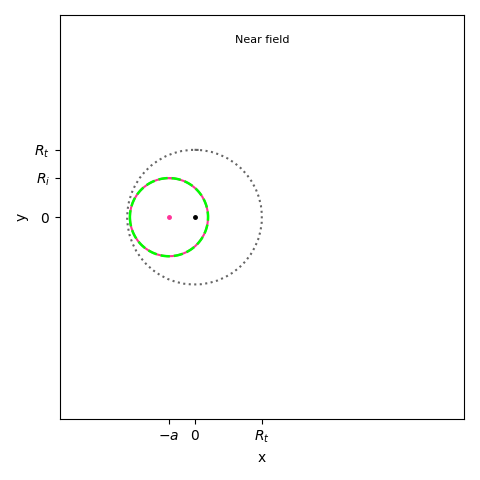

In [11]:


zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

print('bavarian')
#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=11.5)

ax.set_yticks([0,Rp,Rt],["$0$","$R_{i}$","$R_{t}$"],minor=False)


ax.text(0.5,0.95,\
        r"Near field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z intersecting cc

done


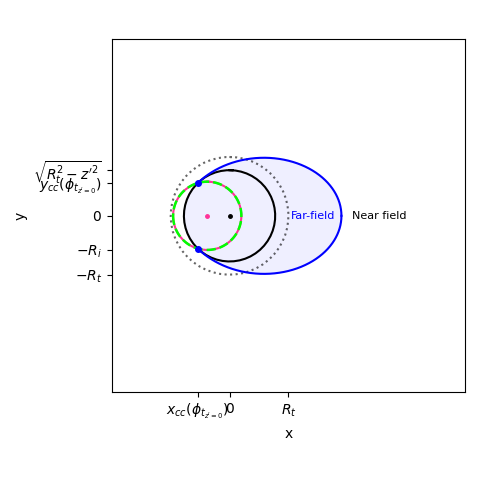

In [ ]:


zint=(np.sqrt(2*offset*(b+Rp))+np.sqrt(2*offset*(b-Rp)))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([xint_plot[ind[-1]],0,Rt],["$x_{cc}(\phi_{t_{z'=0}})$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[-1]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=12.5)

ax.set_yticks([Rtz,yint_plot[ind[-1]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[0]]-0.1-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Far-field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[0]]+0.18-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Near field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z=0

nan 3.141592653589793
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/739250301.py:52: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)


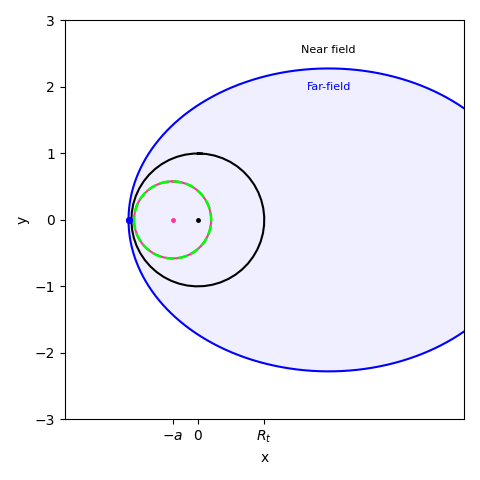

In [13]:


zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])



Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_ymax]]-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.2-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_ymax]]-0.-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]+0.2-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='center',verticalalignment='bottom', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z<0

nan 3.141592653589793
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/3075637634.py:52: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)


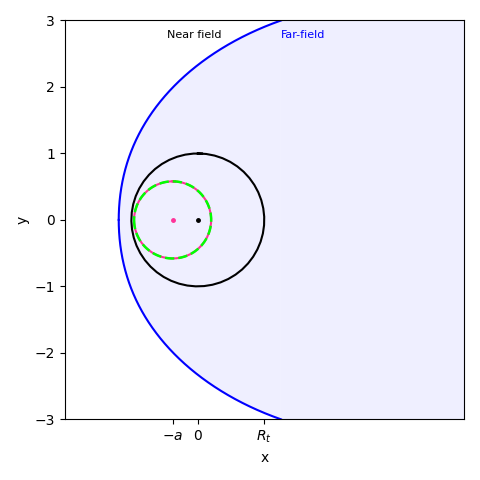

In [14]:


zint=-0.5


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_ymax]]-0.-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_ymax]]-0.9-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')


## Non-grazing not enclosing pole

In [15]:
bimp=0.35
Rt=1.0
Rp=0.4#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


xrange=[-2,4]
yrange=[-3,3]

### z above planet

bavarian
ardvark
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/691314794.py:54: RuntimeWarning: divide by zero encountered in divide
  tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:38: RuntimeWarning: invalid value encountered in subtract
  zpl=xg0*yg-yg0*xg +zg0


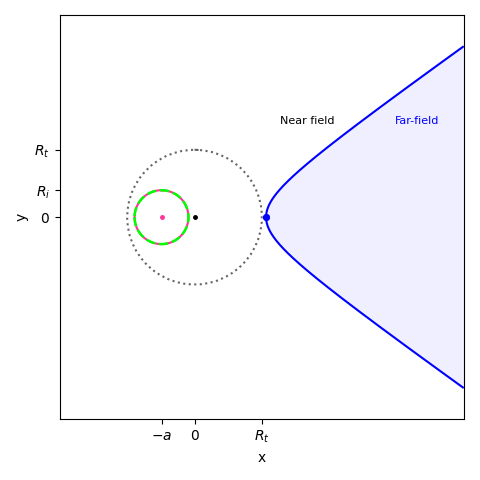

In [16]:


zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

print('bavarian')
#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi_limit=np.arccos(Rp/offset)
phi=np.concatenate((np.linspace(0, 0.9*phi_limit, Nplot),np.linspace(0.9*phi_limit, phi_limit, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

# Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
# Rtz=np.sqrt(Rt**2-zint**2)
# xtemp=np.linspace(-Rtz,xint_plot[ind[0]],Nplot)
# ytemp=np.sqrt(Rtz**2-(xtemp)**2)
# ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[-1]],xrange[1]], yint_plot[ind[-1]]*np.ones(2),\
                -yint_plot[ind[-1]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)


print('ardvark')
ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[0]],yint_plot[ind[0]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[0]],-yint_plot[ind[0]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=11.5)

ax.set_yticks([0,Rp,Rt],["$0$","$R_{i}$","$R_{t}$"],minor=False)


ax.text((xint_plot[ind[-Nplot//9]]+0.4-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[-Nplot//9]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[-Nplot//9]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[-Nplot//9]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z intersecting cc

done


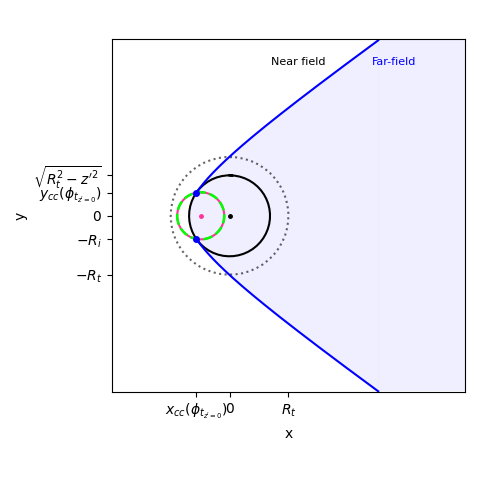

In [17]:


zint=(np.sqrt(2*offset*(b-Rp))+np.sqrt(2*offset*(b+Rp)))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([xint_plot[ind[-1]],0,Rt],["$x_{cc}(\phi_{t_{z'=0}})$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[-1]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=12.5)

ax.set_yticks([Rtz,yint_plot[ind[-1]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[0]]-0.1-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[0]]-0.9-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z=0

[ 4.68332211e+13  1.14142382e+04  5.70508027e+03 ... -1.12359544e+00
 -1.12359549e+00 -1.12359551e+00]
[3.31367793e+13 8.08045561e+03 4.04094825e+03 ... 5.67656438e-04
 2.83828213e-04 3.53410770e-13]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)


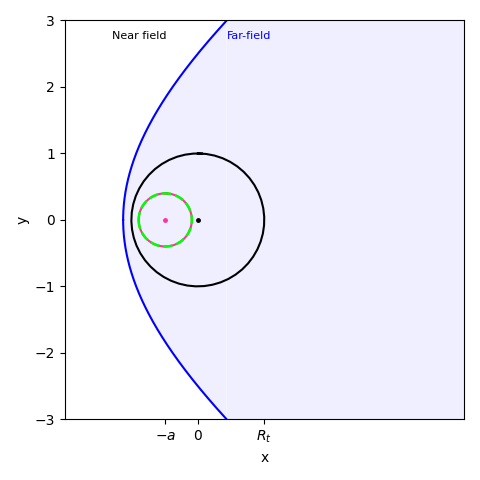

In [18]:


zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

print(xint_plot)
print(yint_plot)

# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)
print(x0)
print(y0)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_ymax]]-0.-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_ymax]]-0.9-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')



fig.tight_layout()
print('done')

### z<0

[ 5.17161874e+13  1.26043735e+04  6.29996239e+03 ... -1.17482695e+00
 -1.17482701e+00 -1.17482703e+00]
[3.65917152e+13 8.92294923e+03 4.46227123e+03 ... 6.47832395e-04
 3.23916194e-04 4.03370806e-13]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)


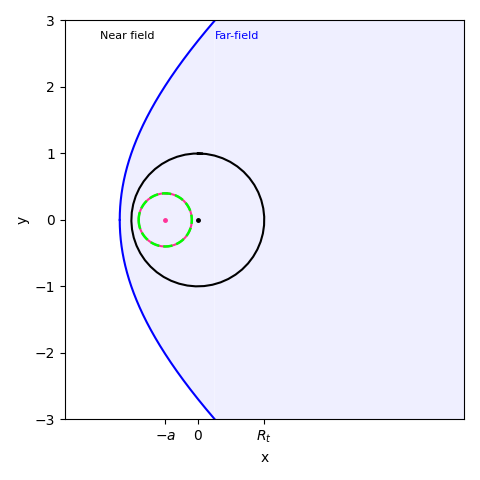

In [19]:


zint=-0.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

print(xint_plot)
print(yint_plot)

# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)
print(x0)
print(y0)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
# ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_ymax]]-0.-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_ymax]]-0.9-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

## Grazing but enclosing pole

In [20]:
bimp=0.3
Rt=1.0
Rp=0.8#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


xrange=[-2,4]
yrange=[-3,3]

### z above planet

bavarian
done


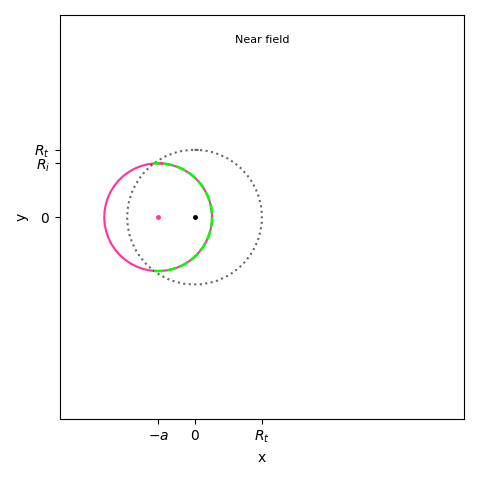

In [21]:


zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

print('bavarian')
#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=11.5)

ax.set_yticks([0,Rp,Rt],["$0$","$R_{i}$","$R_{t}$"],minor=False)


ax.text(0.5,0.95,\
        r"Near field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z intersecting cc

done


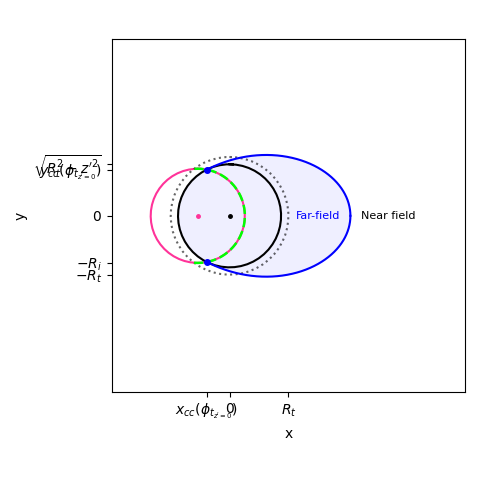

In [22]:


zint=np.sqrt(2*offset*(b+Rp))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([xint_plot[ind[-1]],0,Rt],["$x_{cc}(\phi_{t_{z'=0}})$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[-1]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=12.5)

ax.set_yticks([Rtz,yint_plot[ind[-1]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[0]]-0.18-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Far-field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[0]]+0.18-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Near field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z=0

nan 1.650045921907247
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/1456158199.py:52: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)


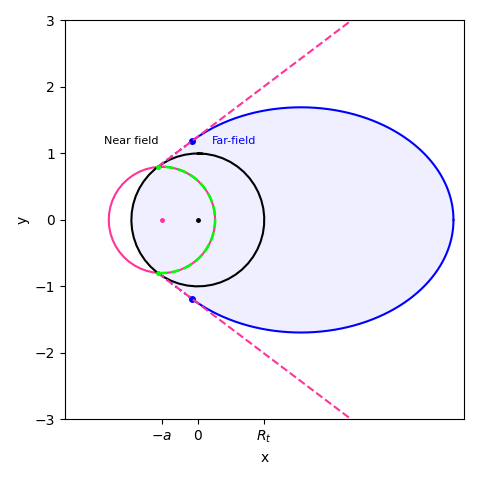

In [23]:


zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])



Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_min]]+0.3-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z<0

nan 1.650045921907247
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/2439561879.py:52: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)


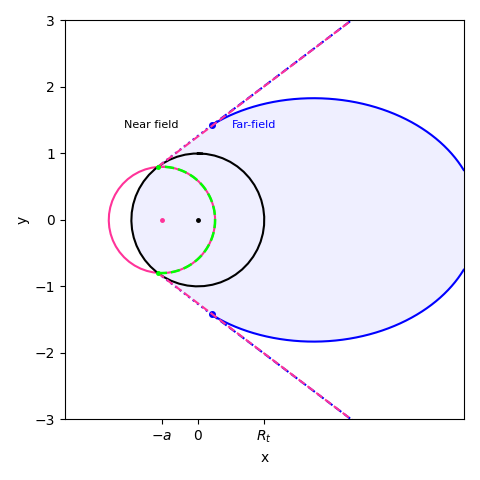

In [24]:


zint=-0.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])



Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_min]]+0.3-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

## Grazing not enclosing pole

In [25]:
bimp=0.45
Rt=1.0
Rp=0.6#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


xrange=[-2,4]
yrange=[-3,3]

### z above planet

bavarian
ardvark
done


/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/691314794.py:54: RuntimeWarning: divide by zero encountered in divide
  tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_36969/645169312.py:38: RuntimeWarning: invalid value encountered in subtract
  zpl=xg0*yg-yg0*xg +zg0


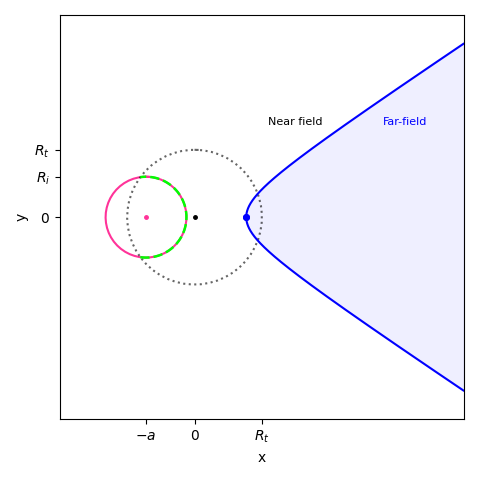

In [26]:


zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

print('bavarian')
#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi_limit=np.arccos(Rp/offset)
phi=np.concatenate((np.linspace(0, 0.9*phi_limit, Nplot),np.linspace(0.9*phi_limit, phi_limit, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

# Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
# Rtz=np.sqrt(Rt**2-zint**2)
# xtemp=np.linspace(-Rtz,xint_plot[ind[0]],Nplot)
# ytemp=np.sqrt(Rtz**2-(xtemp)**2)
# ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[-1]],xrange[1]], yint_plot[ind[-1]]*np.ones(2),\
                -yint_plot[ind[-1]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)


print('ardvark')
ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[0]],yint_plot[ind[0]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[0]],-yint_plot[ind[0]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=11.5)

ax.set_yticks([0,Rp,Rt],["$0$","$R_{i}$","$R_{t}$"],minor=False)


ax.text((xint_plot[ind[-Nplot//9]]+0.4-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[-Nplot//9]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[-Nplot//9]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[-Nplot//9]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z intersecting cc

done


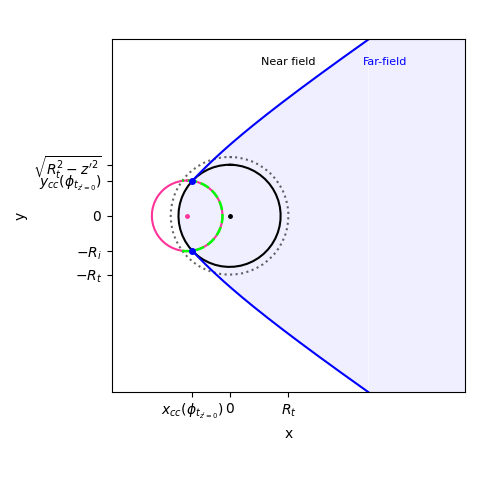

In [27]:


zint=np.sqrt(2*offset*(b+Rp))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax.fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax.plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax.plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([xint_plot[ind[-1]],0,Rt],["$x_{cc}(\phi_{t_{z'=0}})$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[-1]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
# ax.tick_params(axis='x', which='minor', length=12.5)

ax.set_yticks([Rtz,yint_plot[ind[-1]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[0]]-0.1-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Far-field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[0]]-0.9-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Near field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z=0

[ 3.59138726e+13  1.85851674e+04  9.29110038e+03 ... -2.00403817e-01
 -2.00539906e-01 -2.00675961e-01]
[2.38225681e+13 1.23310202e+04 6.16603337e+03 ... 1.41203175e+00
 1.41184748e+00 1.41166324e+00]
[-0.80444444 -0.78305844 -0.76167243 -0.74028642 -0.71890041 -0.6975144
 -0.6761284  -0.65474239 -0.63335638 -0.61197037 -0.59058436 -0.56919835
 -0.54781235 -0.52642634 -0.50504033 -0.48365432 -0.46226831 -0.4408823
 -0.4194963  -0.39811029 -0.37672428 -0.35533827 -0.33395226 -0.31256626
 -0.29118025 -0.26979424 -0.24840823 -0.22702222 -0.20563621 -0.18425021
 -0.1628642  -0.14147819 -0.12009218 -0.09870617 -0.07732016 -0.05593416
 -0.03454815 -0.01316214  0.00822387  0.02960988  0.05099588  0.07238189
  0.0937679   0.11515391  0.13653992  0.15792593  0.17931193  0.20069794
  0.22208395  0.24346996  0.26485597  0.28624198  0.30762798  0.32901399
  0.3504      0.37178601  0.39317202  0.41455802  0.43594403  0.45733004
  0.47871605  0.50010206  0.52148807  0.54287407  0.56426008  0.58564609

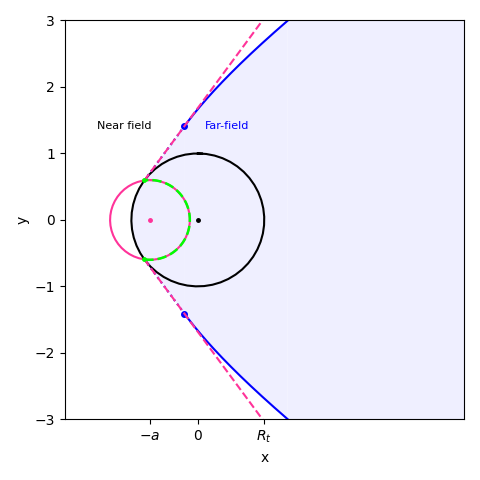

In [28]:


zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

print(xint_plot)
print(yint_plot)

# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)
print(x0)
print(y0)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_min]]+0.3-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

### z<0

[3.98286708e+13 2.06111357e+04 1.03039672e+04 ... 4.14984503e+00
 5.95096092e+00 1.57763364e+05]
[2.64193514e+13 1.36751721e+04 6.83816976e+03 ... 7.30439402e+00
 9.74315904e+00 2.13647985e+05]
[-0.80444444 -0.78305844 -0.76167243 -0.74028642 -0.71890041 -0.6975144
 -0.6761284  -0.65474239 -0.63335638 -0.61197037 -0.59058436 -0.56919835
 -0.54781235 -0.52642634 -0.50504033 -0.48365432 -0.46226831 -0.4408823
 -0.4194963  -0.39811029 -0.37672428 -0.35533827 -0.33395226 -0.31256626
 -0.29118025 -0.26979424 -0.24840823 -0.22702222 -0.20563621 -0.18425021
 -0.1628642  -0.14147819 -0.12009218 -0.09870617 -0.07732016 -0.05593416
 -0.03454815 -0.01316214  0.00822387  0.02960988  0.05099588  0.07238189
  0.0937679   0.11515391  0.13653992  0.15792593  0.17931193  0.20069794
  0.22208395  0.24346996  0.26485597  0.28624198  0.30762798  0.32901399
  0.3504      0.37178601  0.39317202  0.41455802  0.43594403  0.45733004
  0.47871605  0.50010206  0.52148807  0.54287407  0.56426008  0.58564609
  0.6

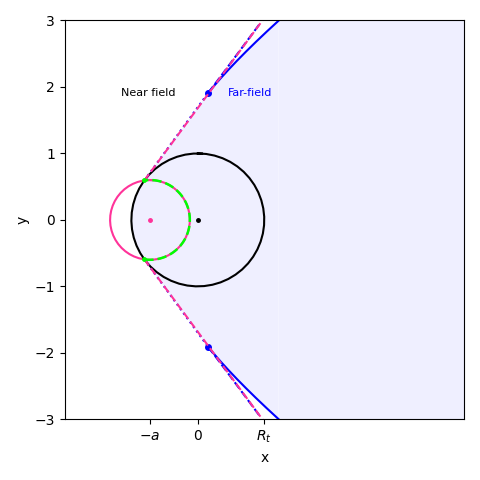

In [29]:


zint=-0.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111)

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax.plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax.plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


# ax.plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
#             'k', alpha=1., lw=1.5)

# ax.plot([-offset,-offset],[-2,2],'k--')
ax.plot([0],[0],'k.',ms=5)
ax.plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax.plot(x, y, '--', color='lime', lw=1.8)

#line perpendicular to any line of contact. Run through a range of phi
# phi=np.pi/3
# phi_plot=np.linspace(-theta0,theta0,500)
# # phi_plot=np.append(np.linspace(-theta0,-0.999*theta0,5000),np.append(np.linspace(-0.999*theta0,0.999*theta0,5000),np.linspace(0.999*theta0,theta0,5000)))
# for phi in phi_plot:

#     t=np.linspace(-2.5,0)
#     # t=np.linspace(-1.1,0)

#     (xpl,ypl,zpl)=calc_tangent(phi,t,Rp,offset,b,1)
    
#     ax.plot(xpl, ypl, 'm', lw=1)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

print(xint_plot)
print(yint_plot)

# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]
ind_min=np.argmin(xint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)
print(x0)
print(y0)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax.fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax.fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax.fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax.fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax.plot(x_join,y_join,'b:')
ax.plot(x_join,-y_join,'b:')

ax.plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax.plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax.plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax.plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

col=[255.,51.,153.]
ax.plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax.plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax.plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax.plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

# xrange=[-2,10]
# yrange=[-6,6]
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_aspect('equal')

# Tidy up by switching off the axes and setting the view orientation.
# ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xticks([-offset,0,Rt],["$-a$","$0$","$R_{t}$"],minor=False)
# ax.tick_params(axis='x', which='major', length=)
# ax.set_xticks([xint_plot[ind[0]]],["$x_{cc}(\phi_{t_{z'=0}})$"],minor=True)
ax.tick_params(axis='x', which='minor', length=11.5)

# ax.set_yticks([Rtz,yint_plot[ind[0]],0,-Rp,-Rt],["$\sqrt{R_t^2-z'^2}$","$y_{cc}(\phi_{t_{z'=0}})$","$0$","$-R_{i}$","$-R_{t}$"],minor=False)


ax.text((xint_plot[ind[ind_min]]+0.3-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Far-field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='b')
ax.text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange[0])/(yrange[1]-yrange[0]),\
        r"Near field", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax.transAxes, color='k')


fig.tight_layout()
print('done')

# Combined plot

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_93270/233377723.py:210: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_93270/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_93270/233377723.py:305: RuntimeWarning: invalid value encountered in arccos
  phi_limit=np.arccos(Rp/offset)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_93270/645169312.py:10: RuntimeWarning: invalid value encountered in sqrt
  (xg0,yg0,zg0)=(-b-offset,np.sign(flag_theta0)*np.sqrt(Rp**2-b**2),0.0)
/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_93270/233377723.py:430: RuntimeWarning: divide by zero encountered in divide
  tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
/var/folde

nan 3.141592653589793
done
bavarian
done
done
done
nan 1.650045921907247
done
done
done
done


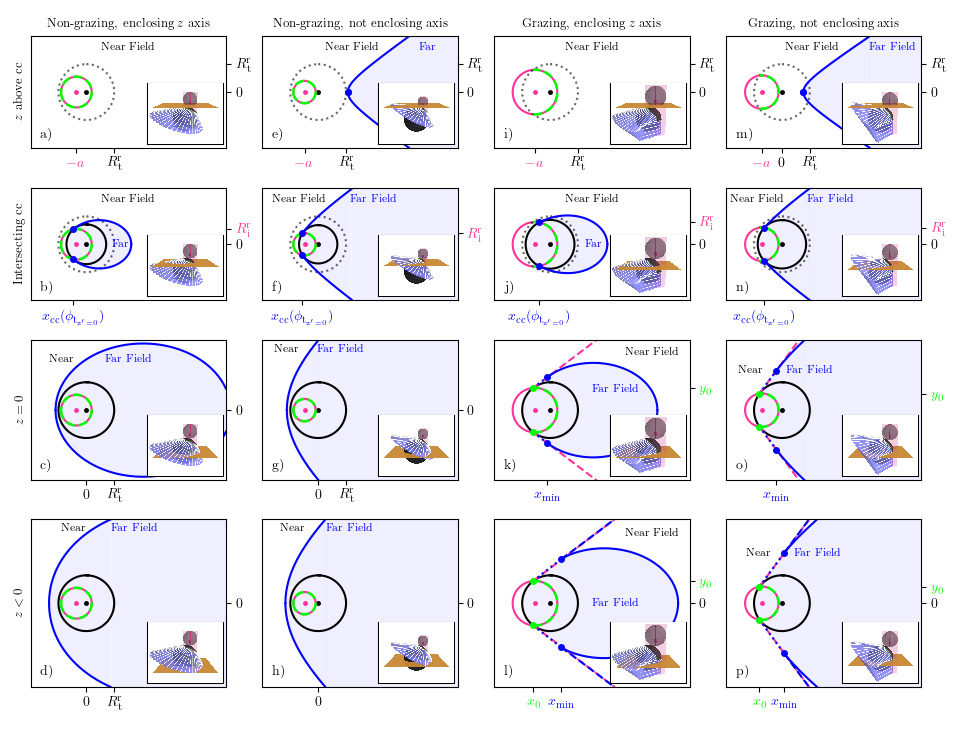

In [11]:
#plot all the options
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fig = plt.figure(figsize=(9.6,7.3))
gs = gridspec.GridSpec(4,4,
#                        wspace=0.05,
                       width_ratios=[1,1,1,1],
                       height_ratios=[1,1,1.2,1.4]
)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

ax = [[None]*4 for j in range(4)]
for i in np.arange(0,4):
    for j in np.arange(4):
        if (i==0)&(j==0):
            ax[i][j]=plt.subplot(gs[i*4+j])
        else:
            ax[i][j]=plt.subplot(gs[i*4+j])
            

xrange=[-2,5]
yrange=[-2,2]
yrange2=[-2.5,2.5]
yrange3=[-3,3]

######################################################################################
######################################################################################
######################################################################################
######################################################################################
## Non-grazing but enclosing pole

bimp=0.23
Rt=1.0
Rp=0.55#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


######################################################################################
### z above planet
zint=1.1

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[0][0].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[0][0].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')

ax[0][0].plot([0],[0],'k.',ms=5)
ax[0][0].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[0][0].plot(x, y, '--', color='lime', lw=1.8)

ax[0][0].set_xlim(xrange)
ax[0][0].set_ylim(yrange)
ax[0][0].set_aspect('equal')

ax[0][0].set_xticks([-offset,Rt],["$-a$",r"$R_{\rm t}^{\rm r}$"],minor=False)
ax[0][0].set_yticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

xticks = ax[0][0].get_xticklabels()
xticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))
# xticks[1].set_alpha(0.4)

ax[0][0].text(0.5,0.95,\
        r"Near Field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax[0][0].transAxes, color='k')


######################################################################################
### z intersecting cc
zint=(np.sqrt(2*offset*(b+Rp))+np.sqrt(2*offset*(b-Rp)))/2

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[1][0].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[1][0].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax[1][0].plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

# ax[1][0].plot([-offset,-offset],[-2,2],'k--')
ax[1][0].plot([0],[0],'k.',ms=5)
ax[1][0].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[1][0].plot(x, y, '--', color='lime', lw=1.8)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax[1][0].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax[1][0].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[1][0].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[1][0].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[1][0].plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax[1][0].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[1][0].plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)

ax[1][0].set_xlim(xrange)
ax[1][0].set_ylim(yrange)
ax[1][0].set_aspect('equal')

ax[1][0].set_xticks([xint_plot[ind[-1]]],[r"$x_{\rm cc}(\phi_{\rm t_{z'=0}})$"],minor=False)
ax[1][0].set_yticks([0,Rp],["$0$",r"$R_{\rm i}^{\rm r}$"],minor=False)

xticks = ax[1][0].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[1][0].get_yticklabels()
yticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[1][0].text((xint_plot[ind[0]]-0.09-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Far", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax[1][0].transAxes, color='b')
# ax[1][0].text((xint_plot[ind[0]]+0.2-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Near field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[1][0].transAxes, color='k')
ax[1][0].text(0.5,0.95,\
        r"Near Field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax[1][0].transAxes, color='k')


######################################################################################
### z=0

zint=0.0

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[2][0].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[2][0].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')

ax[2][0].plot([0],[0],'k.',ms=5)
ax[2][0].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[2][0].plot(x, y, '--', color='lime', lw=1.8)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange2[0])&(yint_plot<=yrange2[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[2][0].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[2][0].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[2][0].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[2][0].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[2][0].plot(x_join,y_join,'b:')
ax[2][0].plot(x_join,-y_join,'b:')

ax[2][0].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][0].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)

col=[255.,51.,153.]
ax[2][0].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[2][0].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[2][0].plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax[2][0].plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

ax[2][0].set_xlim(xrange)
ax[2][0].set_ylim(yrange2)
ax[2][0].set_aspect('equal')

ax[2][0].set_xticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)
ax[2][0].set_yticks([0],["0"],minor=False)


ax[2][0].text(0.38,0.9,\
        r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[2][0].transAxes, color='b')
ax[2][0].text(0.22,0.9,\
        r"Near", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[2][0].transAxes, color='k')


######################################################################################
### z<0

zint=-0.5

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[3][0].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[3][0].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')

ax[3][0].plot([0],[0],'k.',ms=5)
ax[3][0].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[3][0].plot(x, y, '--', color='lime', lw=1.8)

Nplot=10000
phi_limit=np.arccos(Rp/offset)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange3[0])&(yint_plot<=yrange3[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[3][0].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[3][0].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[3][0].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[3][0].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[3][0].plot(x_join,y_join,'b:')
ax[3][0].plot(x_join,-y_join,'b:')

ax[3][0].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][0].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-',lw=1.5)

col=[255.,51.,153.]
ax[3][0].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[3][0].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[3][0].plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax[3][0].plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')

ax[3][0].set_xlim(xrange)
ax[3][0].set_ylim(yrange3)
ax[3][0].set_aspect('equal')

ax[3][0].set_xticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

ax[3][0].set_yticks([0],["0"],minor=False)


ax[3][0].text((xint_plot[ind[ind_ymax]]-0.-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[3][0].transAxes, color='b')
ax[3][0].text((xint_plot[ind[ind_ymax]]-0.91-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Near", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[3][0].transAxes, color='k')


######################################################################################
######################################################################################
######################################################################################
######################################################################################
## Non-grazing not enclosing pole

bimp=0.35
Rt=1.0
Rp=0.4#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1

######################################################################################
### z above planet

zint=1.1

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[0][1].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[0][1].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax[0][1].plot([0],[0],'k.',ms=5)
ax[0][1].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[0][1].plot(x, y, '--', color='lime', lw=1.8)


Nplot=1000
phi_limit=np.arccos(Rp/offset)
phi=np.concatenate((np.linspace(0, 0.9*phi_limit, Nplot),np.linspace(0.9*phi_limit, phi_limit, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]


ax[0][1].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[0][1].fill_between([xint_plot[ind[-1]],xrange[1]], yint_plot[ind[-1]]*np.ones(2),\
                -yint_plot[ind[-1]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)


ax[0][1].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[0][1].plot(xint_plot[ind[0]],yint_plot[ind[0]],'b.',ms=8)
ax[0][1].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[0][1].plot(xint_plot[ind[0]],-yint_plot[ind[0]],'b.',ms=8)


ax[0][1].set_xlim(xrange)
ax[0][1].set_ylim(yrange)
ax[0][1].set_aspect('equal')


ax[0][1].set_xticks([-offset,Rt],["$-a$",r"$R_{\rm t}^{\rm r}$"],minor=False)

ax[0][1].set_yticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

xticks = ax[0][1].get_xticklabels()
xticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[0][1].text(0.8,0.95,\
        r"Far", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[0][1].transAxes, color='b')
ax[0][1].text(0.6,0.95,\
        r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[0][1].transAxes, color='k')

######################################################################################
### z intersecting cc

zint=(np.sqrt(2*offset*(b-Rp))+np.sqrt(2*offset*(b+Rp)))/2

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[1][1].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[1][1].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=0.6, lw=1.5, ls=':')


ax[1][1].plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),
            'k', alpha=1., lw=1.5)

ax[1][1].plot([0],[0],'k.',ms=5)
ax[1][1].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[1][1].plot(x, y, '--', color='lime', lw=1.8)

Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax[1][1].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax[1][1].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[1][1].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[1][1].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[1][1].plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax[1][1].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[1][1].plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)

ax[1][1].set_xlim(xrange)
ax[1][1].set_ylim(yrange)
ax[1][1].set_aspect('equal')

ax[1][1].set_xticks([xint_plot[ind[-1]]],[r"$x_{\rm cc}(\phi_{\rm t_{z'=0}})$"],minor=False)

ax[1][1].set_yticks([Rp],[r"$R_{\rm i}^{\rm r}$"],minor=False)

xticks = ax[1][1].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[1][1].get_yticklabels()
yticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[1][1].text((xint_plot[ind[0]]-0.05-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[1][1].transAxes, color='b')
ax[1][1].text((xint_plot[ind[0]]-0.92-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[1][1].transAxes, color='k')


######################################################################################
### z=0

zint=0.0

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[2][1].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[2][1].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')


ax[2][1].plot([0],[0],'k.',ms=5)
ax[2][1].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[2][1].plot(x, y, '--', color='lime', lw=1.8)


Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange2[0])&(yint_plot<=yrange2[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[2][1].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[2][1].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[2][1].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[2][1].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax[2][1].plot(x_join,y_join,'b:')
ax[2][1].plot(x_join,-y_join,'b:')

ax[2][1].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][1].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)

ax[2][1].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][1].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)


col=[255.,51.,153.]
ax[2][1].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[2][1].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[2][1].plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax[2][1].plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')


ax[2][1].set_xlim(xrange)
ax[2][1].set_ylim(yrange2)
ax[2][1].set_aspect('equal')


ax[2][1].set_xticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

ax[2][1].set_yticks([0],["$0$"],minor=False)


ax[2][1].text((xint_plot[ind[ind_ymax]]-0.04-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange2[0])/(yrange2[1]-yrange2[0]),\
        r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[2][1].transAxes, color='b')
ax[2][1].text((xint_plot[ind[ind_ymax]]-0.72-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange2[0])/(yrange2[1]-yrange2[0]),\
        r"Near ", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[2][1].transAxes, color='k')


######################################################################################
### z<0

zint=-0.1

# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[3][1].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[3][1].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),
            'k', alpha=1.0, lw=1.5, ls='-')

ax[3][1].plot([0],[0],'k.',ms=5)
ax[3][1].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[3][1].plot(x, y, '--', color='lime', lw=1.8)


Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange3[0])&(yint_plot<=yrange3[1]))[0]
ind_min=np.argmin(xint_plot[ind])
ind_ymax=np.argmax(yint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)


Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[3][1].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[3][1].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[3][1].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[3][1].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax[3][1].plot(x_join,y_join,'b:')
ax[3][1].plot(x_join,-y_join,'b:')

ax[3][1].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][1].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[3][1].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][1].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)


col=[255.,51.,153.]
ax[3][1].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[3][1].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[3][1].plot([x0[0]],[y0[0]], '.', ms=5, color='lime')
ax[3][1].plot([x0[0]],[-y0[0]], '.', ms=5, color='lime')


ax[3][1].set_xlim(xrange)
ax[3][1].set_ylim(yrange3)
ax[3][1].set_aspect('equal')


ax[3][1].set_xticks([0],["$0$"],minor=False)


ax[3][1].set_yticks([0],["$0$"],minor=False)


ax[3][1].text((xint_plot[ind[ind_ymax]]+0.02-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[3][1].transAxes, color='b')
ax[3][1].text((xint_plot[ind[ind_ymax]]-0.76-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_ymax]]-0.15-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Near", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[3][1].transAxes, color='k')

print('done')

######################################################################################
######################################################################################
######################################################################################
######################################################################################
## Grazing but enclosing pole

bimp=0.3
Rt=1.0
Rp=0.8#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1

######################################################################################
### z above planet


zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[0][2].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[0][2].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=0.6, lw=1.5, ls=':')

ax[0][2].plot([0],[0],'k.',ms=5)
ax[0][2].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

print('bavarian')
#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[0][2].plot(x, y, '--', color='lime', lw=1.8)

ax[0][2].set_xlim(xrange)
ax[0][2].set_ylim(yrange)
ax[0][2].set_aspect('equal')


ax[0][2].set_xticks([-offset,Rt],["$-a$",r"$R_{\rm t}^{\rm r}$"],minor=False)


ax[0][2].set_yticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

xticks = ax[0][2].get_xticklabels()
xticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[0][2].text(0.5,0.95,\
        r"Near Field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax[0][2].transAxes, color='k')


print('done')

######################################################################################
### z intersecting cc



zint=np.sqrt(2*offset*(b+Rp))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[1][2].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[1][2].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=0.6, lw=1.5, ls=':')


ax[1][2].plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),\
            'k', alpha=1., lw=1.5)


ax[1][2].plot([0],[0],'k.',ms=5)
ax[1][2].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[1][2].plot(x, y, '--', color='lime', lw=1.8)


Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax[1][2].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax[1][2].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[1][2].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax[1][2].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[1][2].plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax[1][2].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[1][2].plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax[1][2].set_xlim(xrange)
ax[1][2].set_ylim(yrange)
ax[1][2].set_aspect('equal')

ax[1][2].set_xticks([xint_plot[ind[-1]]],[r"$x_{\rm cc}(\phi_{\rm t_{z'=0}})$"],minor=False)

ax[1][2].set_yticks([0,Rp],["$0$",r"$R_{\rm i}^{\rm r}$"],minor=False)

xticks = ax[1][2].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[1][2].get_yticklabels()
yticks[1].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[1][2].text((xint_plot[ind[0]]-0.18-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Far", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax[1][2].transAxes, color='b')
# ax[1][2].text((xint_plot[ind[0]]+0.18-xrange[0])/(xrange[1]-xrange[0]), 0.5, r"Near field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[1][2].transAxes, color='k')
ax[1][2].text(0.5,0.95,\
        r"Near Field", horizontalalignment='center',verticalalignment='top', fontsize=8,transform=ax[1][2].transAxes, color='k')


print('done')


######################################################################################
### z=0

zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[2][2].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[2][2].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=1.0, lw=1.5, ls='-')

ax[2][2].plot([0],[0],'k.',ms=5)
ax[2][2].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[2][2].plot(x, y, '--', color='lime', lw=1.8)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange2[0])&(yint_plot<=yrange2[1]))[0]
ind_min=np.argmin(xint_plot[ind])



Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[2][2].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[2][2].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[2][2].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[2][2].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

col=[255.,51.,153.]
ax[2][2].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
ax[2][2].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)

ax[2][2].plot(x_join,y_join,'b:')
ax[2][2].plot(x_join,-y_join,'b:')

ax[2][2].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][2].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[2][2].plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax[2][2].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][2].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[2][2].plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)


ax[2][2].plot([x0[0]],[y0[0]], '.', ms=8, color='lime')
ax[2][2].plot([x0[0]],[-y0[0]], '.', ms=8, color='lime')

ax[2][2].set_xlim(xrange)
ax[2][2].set_ylim(yrange2)
ax[2][2].set_aspect('equal')

ax[2][2].set_xticks([xint_plot[ind[ind_min]]],[r"$x_{\rm min}$"],minor=False)

ax[2][2].set_yticks([y0[0]],["$y_0$"],minor=False)

xticks = ax[2][2].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[2][2].get_yticklabels()
yticks[0].set_color('lime')


ax[2][2].text(0.5,0.65,\
        r"Far Field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[2][2].transAxes, color='b')
ax[2][2].text(0.95,0.95,\
        r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[2][2].transAxes, color='k')


print('done')

######################################################################################
### z<0

zint=-0.2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[3][2].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[3][2].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=1.0, lw=1.5, ls='-')


ax[3][2].plot([0],[0],'k.',ms=5)
ax[3][2].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[3][2].plot(x, y, '--', color='lime', lw=1.8)


Nplot=10000
phi_limit=np.arccos(Rp/offset)
print(phi_limit,theta0)
phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),\
                    np.linspace(0.9*theta0, theta0, Nplot)))

tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)


ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange3[0])&(yint_plot<=yrange3[1]))[0]
ind_min=np.argmin(xint_plot[ind])



Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[3][2].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[3][2].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[3][2].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[3][2].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

col=[255.,51.,153.]
ax[3][2].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
ax[3][2].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)


ax[3][2].plot(x_join,y_join,'b:')
ax[3][2].plot(x_join,-y_join,'b:')

ax[3][2].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][2].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[3][2].plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax[3][2].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][2].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[3][2].plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)


ax[3][2].plot([x0[0]],[y0[0]], '.', ms=8, color='lime')
ax[3][2].plot([x0[0]],[-y0[0]], '.', ms=8, color='lime')

ax[3][2].set_xlim(xrange)
ax[3][2].set_ylim(yrange3)
ax[3][2].set_aspect('equal')


ax[3][2].set_xticks([x0[0],xint_plot[ind[ind_min]]],["$x_0$",r"$x_{\rm min}$"],minor=False)

ax[3][2].set_yticks([0,y0[0]],["0","$y_0$"],minor=False)

xticks = ax[3][2].get_xticklabels()
xticks[1].set_color('b')
xticks[0].set_color('lime')


yticks = ax[3][2].get_yticklabels()
yticks[1].set_color('lime')



ax[3][2].text(0.5,0.5,\
        r"Far Field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[3][2].transAxes, color='b')
ax[3][2].text(0.95,0.95,\
        r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[3][2].transAxes, color='k')



print('done')


######################################################################################
######################################################################################
######################################################################################
######################################################################################
## Grazing not enclosing pole

bimp=0.45
Rt=1.0
Rp=0.6#0.9018332728407688
offset=(Rt+Rp)*bimp
Rp=Rp/Rt
offset=offset/Rt
Rt=1.



b=(Rt**2-Rp**2-offset**2)/(2*offset)

#set the range of phi depending on the regime we are in    
if Rt>=(Rp+offset):
    theta0=np.pi
    flag_regime=0
elif Rt<(Rp+offset):
    theta0=np.arccos(-b/Rp)
    flag_regime=1


######################################################################################
### z above planet



zint=1.1


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100


ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[0][3].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[0][3].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=0.6, lw=1.5, ls=':')


ax[0][3].plot([0],[0],'k.',ms=5)
ax[0][3].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)

#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[0][3].plot(x, y, '--', color='lime', lw=1.8)


Nplot=1000
phi_limit=np.arccos(Rp/offset)
phi=np.concatenate((np.linspace(0, 0.9*phi_limit, Nplot),np.linspace(0.9*phi_limit, phi_limit, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

ax[0][3].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[0][3].fill_between([xint_plot[ind[-1]],xrange[1]], yint_plot[ind[-1]]*np.ones(2),\
                -yint_plot[ind[-1]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)


ax[0][3].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[0][3].plot(xint_plot[ind[0]],yint_plot[ind[0]],'b.',ms=8)
ax[0][3].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[0][3].plot(xint_plot[ind[0]],-yint_plot[ind[0]],'b.',ms=8)


ax[0][3].set_xlim(xrange)
ax[0][3].set_ylim(yrange)
ax[0][3].set_aspect('equal')

ax[0][3].set_xticks([-offset,0,Rt],["$-a$","$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

ax[0][3].set_yticks([0,Rt],["$0$",r"$R_{\rm t}^{\rm r}$"],minor=False)

xticks = ax[0][3].get_xticklabels()
xticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))



ax[0][3].text(0.73,0.95,\
        r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[0][3].transAxes, color='b')
ax[0][3].text(0.58,0.95,\
        r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[0][3].transAxes, color='k')


print('done')

######################################################################################
### z intersecting cc

zint=np.sqrt(2*offset*(b+Rp))/2


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[1][3].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[1][3].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=0.6, lw=1.5, ls=':')


ax[1][3].plot(np.sqrt(Rt**2-zint**2)*np.sin(theta)*np.cos(phi), np.sqrt(Rt**2-zint**2)*np.cos(theta)*np.cos(phi),\
            'k', alpha=1., lw=1.5)

# ax[1][3].plot([-offset,-offset],[-2,2],'k--')
ax[1][3].plot([0],[0],'k.',ms=5)
ax[1][3].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[1][3].plot(x, y, '--', color='lime', lw=1.8)


Nplot=1000
phi=np.concatenate((np.linspace(0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.arange(np.size(xint_plot))
ind=np.where((tint<=0)&(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange[0])&(yint_plot<=yrange[1]))[0]

Nplot=100
ax[1][3].fill_between(xint_plot[ind], yint_plot[ind],-yint_plot[ind],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
Rtz=np.sqrt(Rt**2-zint**2)
xtemp=np.linspace(-Rtz,xint_plot[ind[-1]],Nplot)
ytemp=np.sqrt(Rtz**2-(xtemp)**2)
ax[1][3].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[1][3].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)



ax[1][3].plot(xint_plot[ind],yint_plot[ind],'b-', lw=1.5)
ax[1][3].plot(xint_plot[ind[-1]],yint_plot[ind[-1]],'b.',ms=8)
ax[1][3].plot(xint_plot[ind],-yint_plot[ind],'b-', lw=1.5)
ax[1][3].plot(xint_plot[ind[-1]],-yint_plot[ind[-1]],'b.',ms=8)


ax[1][3].set_xlim(xrange)
ax[1][3].set_ylim(yrange)
ax[1][3].set_aspect('equal')

ax[1][3].set_xticks([xint_plot[ind[-1]]],[r"$x_{\rm cc}(\phi_{\rm t_{z'=0}})$"],minor=False)
ax[1][3].set_yticks([0,Rp],["$0$",r"$R_{\rm i}^{\rm r}$"],minor=False)


xticks = ax[1][3].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[1][3].get_yticklabels()
yticks[1].set_color((col[0]/255, col[1]/255, col[2]/255))


ax[1][3].text((xint_plot[ind[0]]-0.08-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Far Field", horizontalalignment='left',verticalalignment='top', fontsize=8,transform=ax[1][3].transAxes, color='b')
ax[1][3].text((xint_plot[ind[0]]-0.9-xrange[0])/(xrange[1]-xrange[0]), 0.95, r"Near Field", horizontalalignment='right',verticalalignment='top', fontsize=8,transform=ax[1][3].transAxes, color='k')


print('done')


######################################################################################
### z=0



zint=0.0


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[2][3].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[2][3].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=1.0, lw=1.5, ls='-')


ax[2][3].plot([0],[0],'k.',ms=5)
ax[2][3].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[2][3].plot(x, y, '--', color='lime', lw=1.8)


Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange2[0])&(yint_plot<=yrange2[1]))[0]
ind_min=np.argmin(xint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[2][3].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[2][3].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[2][3].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[2][3].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

col=[255.,51.,153.]
ax[2][3].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[2][3].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[2][3].plot(x_join,y_join,'b:')
ax[2][3].plot(x_join,-y_join,'b:')

ax[2][3].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][3].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[2][3].plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax[2][3].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[2][3].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[2][3].plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

ax[2][3].plot([x0[0]],[y0[0]], '.', ms=8, color='lime', lw=1.8)
ax[2][3].plot([x0[0]],[-y0[0]], '.', ms=8, color='lime', lw=1.8)


ax[2][3].set_xlim(xrange)
ax[2][3].set_ylim(yrange2)
ax[2][3].set_aspect('equal')

ax[2][3].set_xticks([xint_plot[ind[ind_min]]],[r"$x_{\rm min}$"],minor=False)
ax[2][3].set_yticks([y0[0]],["$y_0$"],minor=False)

xticks = ax[2][3].get_xticklabels()
xticks[0].set_color('b')

yticks = ax[2][3].get_yticklabels()
yticks[0].set_color('lime')


ax[2][3].text((xint_plot[ind[ind_min]]+0.34-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange2[0])/(yrange2[1]-yrange2[0]),\
        r"Far Field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[2][3].transAxes, color='b')
ax[2][3].text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange2[0])/(yrange2[1]-yrange2[0]),\
        r"Near ", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax[2][3].transAxes, color='k')

print('done')

######################################################################################
### z<0



zint=-0.07


# The cylinder radius; the intersecting sphere has radius 2a.
Nplot=100

ng = Nplot//2 + 1
# We only need to go from 0 to 2π for circles!
t = np.linspace(-2*np.pi, 2*np.pi, Nplot)
theta = t[:ng]
col=[255.,51.,153.]
ax[3][3].plot( Rp*np.sin(theta)-offset,Rp*np.cos(theta), 
                '-', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0, lw=1.5)
phi=0.0
ax[3][3].plot(Rt*np.sin(theta)*np.cos(phi), Rt*np.cos(theta)*np.cos(phi),\
            'k', alpha=1.0, lw=1.5, ls='-')


ax[3][3].plot([0],[0],'k.',ms=5)
ax[3][3].plot([-offset],[0],'.',color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0,ms=5)


#define phi and calcualte b
phi=np.concatenate((np.linspace(-theta0, -0.9*theta0, Nplot),\
                    np.linspace(-0.9*theta0, 0.9*theta0, Nplot),np.linspace(0.9*theta0, theta0, Nplot)))
(x,y,z)=(Rp*np.cos(phi)-offset ,Rp*np.sin(phi), + np.sqrt(2*offset*(b+Rp*np.cos(phi)))) #Calculate the positive z side of intersection

#plot the intersection
ax[3][3].plot(x, y, '--', color='lime', lw=1.8)

Nplot=10000
phi_limit=np.arccos(Rp/offset)

phi=np.linspace(phi_limit*(1+1E-13), (1-1E-13)*theta0, Nplot)


tint=(zint-np.sqrt(2*offset*(b+Rp*np.cos(phi))))/(2*Rp*np.sqrt(b+Rp*np.cos(phi))*(Rp-offset*np.cos(phi)))
(xint_plot,yint_plot,zint_plot)=calc_tangent(phi,tint,Rp,offset,b,1,flag_theta0=0)

# ind=np.arange(np.size(xint_plot))
ind=np.where((np.isnan(xint_plot)==False)&(np.isinf(xint_plot)==False)&(tint<=0)\
             &(xint_plot>=xrange[0])\
             &(xint_plot<xrange[1])&(yint_plot>=yrange3[0])&(yint_plot<=yrange3[1]))[0]
ind_min=np.argmin(xint_plot[ind])


Nplot=100
t0=np.linspace(0,-5,Nplot)
(x0,y0,z0)=calc_tangent(theta0,t0,Rp,offset,b,1,flag_theta0=1)

Nplot=100
x_join=np.linspace(x0[0],xint_plot[ind[ind_min]],Nplot)
y_join=np.linspace(y0[0],yint_plot[ind[ind_min]],Nplot)


Nplot=100
ax[3][3].fill_between(xint_plot[ind[0:ind_min+1]], yint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],color=(0.5,0.5,1.0),alpha=0.12,ec=None)
xtemp=np.linspace(-Rt,x0[0],Nplot)
ytemp=np.sqrt(Rt**2-(xtemp)**2)
ax[3][3].fill_between(xtemp, ytemp,-ytemp,color=(0.5,0.5,1.0),alpha=0.12,ec=None)
ax[3][3].fill_between([xint_plot[ind[0]],xrange[1]], yint_plot[ind[0]]*np.ones(2),\
                -yint_plot[ind[0]]*np.ones(2),color=(0.5,0.5,1.0),alpha=0.12,ec=None)

ax[3][3].fill_between(x_join,y_join,-y_join,color=(0.5,0.5,1.0),alpha=0.12,ec=None)

col=[255.,51.,153.]
ax[3][3].plot(x0,y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)
ax[3][3].plot(x0,-y0, '--', color=(col[0]/255, col[1]/255, col[2]/255),alpha=1.0)

ax[3][3].plot(x_join,y_join,'b:')
ax[3][3].plot(x_join,-y_join,'b:')

ax[3][3].plot(xint_plot[ind[0:ind_min+1]],yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][3].plot(xint_plot[ind[ind_min+1:]],yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[3][3].plot(xint_plot[ind[ind_min]],yint_plot[ind[ind_min]],'b.',ms=8)
ax[3][3].plot(xint_plot[ind[0:ind_min+1]],-yint_plot[ind[0:ind_min+1]],'b-', lw=1.5)
ax[3][3].plot(xint_plot[ind[ind_min+1:]],-yint_plot[ind[ind_min+1:]],'b--', lw=1.5)
ax[3][3].plot(xint_plot[ind[ind_min]],-yint_plot[ind[ind_min]],'b.',ms=8)

ax[3][3].plot([x0[0]],[y0[0]], '.', ms=8, color='lime', lw=1.8)
ax[3][3].plot([x0[0]],[-y0[0]], '.', ms=8, color='lime', lw=1.8)

ax[3][3].set_xlim(xrange)
ax[3][3].set_ylim(yrange3)
ax[3][3].set_aspect('equal')

ax[3][3].set_xticks([x0[0],xint_plot[ind[ind_min]]],["$x_0$",r"$x_{\rm min}$"],minor=False)
ax[3][3].set_yticks([0,y0[0]],["0","$y_0$"],minor=False)

xticks = ax[3][3].get_xticklabels()
xticks[1].set_color('b')
xticks[0].set_color('lime')

yticks = ax[3][3].get_yticklabels()
yticks[1].set_color('lime')

ax[3][3].text((xint_plot[ind[ind_min]]+0.34-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Far Field", horizontalalignment='left',verticalalignment='center', fontsize=8,transform=ax[3][3].transAxes, color='b')
ax[3][3].text((xint_plot[ind[ind_min]]-0.5-xrange[0])/(xrange[1]-xrange[0]),\
        (yint_plot[ind[ind_min]]+0.-yrange3[0])/(yrange3[1]-yrange3[0]),\
        r"Near", horizontalalignment='right',verticalalignment='center', fontsize=8,transform=ax[3][3].transAxes, color='k')




ax[0][0].set_title('Non-grazing, enclosing $z$ axis',fontsize=9)
ax[0][1].set_title('Non-grazing, not enclosing axis', fontsize=9)
ax[0][2].set_title('Grazing, enclosing $z$ axis',fontsize=9)
ax[0][3].set_title('Grazing, not enclosing axis', fontsize=9)

letter=[['a)','e)','i)','m)'],\
        ['b)','f)','j)','n)'],\
        ['c)','g)','k)','o)'],\
        ['d)','h)','l)','p)']]
        
for i in np.arange(4):
    for j in np.arange(4):
        ax[i][j].yaxis.tick_right()
        ax[i][j].text(0.05,0.05,\
            letter[i][j], horizontalalignment='left',verticalalignment='bottom', fontsize=10,transform=ax[i][j].transAxes, color='k')

for i in np.arange(4):
    for j in np.arange(4):
        if (j>1)&(i==2):
            yticks = ax[i][j].get_yticklabels()
            yticks[0].set_color('lime')
    
        if (j>1)&(i==3):
            yticks = ax[i][j].get_yticklabels()
            yticks[1].set_color('lime')

        
    yticks = ax[1][i].get_yticklabels()
    if i==1:
        yticks[0].set_color((col[0]/255, col[1]/255, col[2]/255))
    else:
        yticks[1].set_color((col[0]/255, col[1]/255, col[2]/255))
    
    
    

ax[0][0].set_ylabel('$z$ above cc',fontsize=9)
ax[1][0].set_ylabel('Intersecting cc',fontsize=9)
ax[2][0].set_ylabel('$z=0$',fontsize=9)
ax[3][0].set_ylabel('$z<0$',fontsize=9)


from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.image as mpimg
for i in np.arange(4):
    for j in np.arange(4)[0:]:
        inset_im = mpimg.imread('near_far_field_example_inset'+str(j)+str(i)+'.png')


        imagebox = OffsetImage(inset_im, zoom=0.018)
        imagebox.image.axes = ax[i][j]

        frame_properties={'edgecolor':'k',\
                          'linewidth':1.5,\
                          'facecolor':'none'}

        if i<2:
            position=(0.791,0.304)
        elif i==2:
            position=(0.791,0.291/1.2)
        else:
            position=(0.791,0.284/1.4)
        ab = AnnotationBbox(imagebox, position,pad=0.0, \
                            xycoords='axes fraction', boxcoords='axes fraction', #boxalignment='center',
                           bboxprops=frame_properties)#,frameon=False


        ax[i][j].add_artist(ab)

plt.draw()


fig.tight_layout(pad=1.0,h_pad=0.3,w_pad=0.4)

In [12]:
plt.savefig('near_far_examples.pdf', dpi=2000)
print('done')

done


# End

done
